In [1]:
import pymysql,os
import numpy as np
from astropy import units as u
from astropy.coordinates import SkyCoord
import pandas, alminer, glob
import matplotlib.pyplot as plt

from salvage_post_processing_tools import *

In [2]:
fpath = '/arc/projects/salvage/ALMA_reduction/samples/'
file  = 'salvage-AGN-July8-sample_match-lt-4rp_mrs-gt-2rp_qa2-pass_no-inf-dups.txt'

objID_sample, year_sample, muid_sample, proj_sample, name_sample = np.loadtxt(fpath+file, unpack = True, dtype = str, usecols = [0,9,10,11,12])
z_sample, mass_sample, rpetro_sample, ra_sample, dec_sample, res_sample, mrs_sample, sens_sample = np.loadtxt(fpath+file, unpack = True, dtype = float, usecols = [1,2,3,4,5,6,7,8])
K03, K01, WISE, LERG = np.loadtxt(fpath+file, unpack = True, dtype = bool, usecols = [13,14,15,16])
AGN = K03|WISE|LERG

print(len(objID_sample))

262


In [3]:
count = 0
for ID in objID_sample:

    imagename = f'/arc/projects/salvage/ALMA_reduction/phangs_pipeline/derived/{ID}/{ID}_12m_co10_strict_mom0.fits'

    if os.path.isfile(imagename):

        count+=1

count

182

In [16]:
262 - 46

216

In [23]:
count / (262 - 46)

0.8425925925925926

In [24]:
len(proj_sample[proj_sample=='2022.1.00482.S'])

26

# Plot Moments and Extract Masses

587722982291865751
'resolution' from archive:  2.6683100162968527
'BMAJ' from header:  3.46292366945508


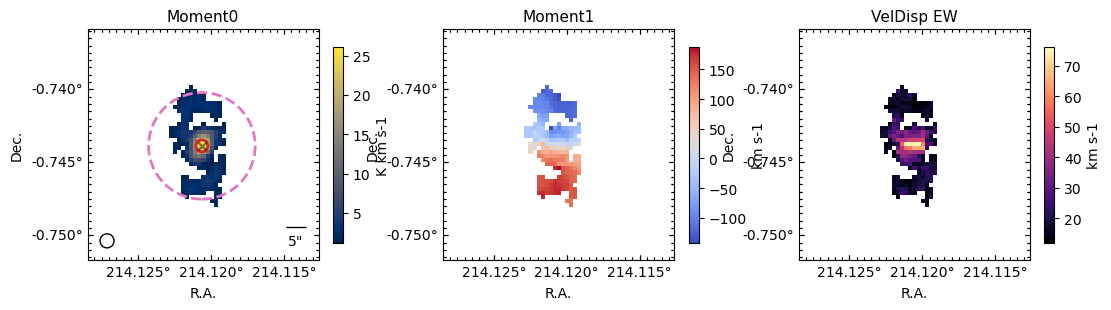

'BMAJ' from header:  3.46292366945508


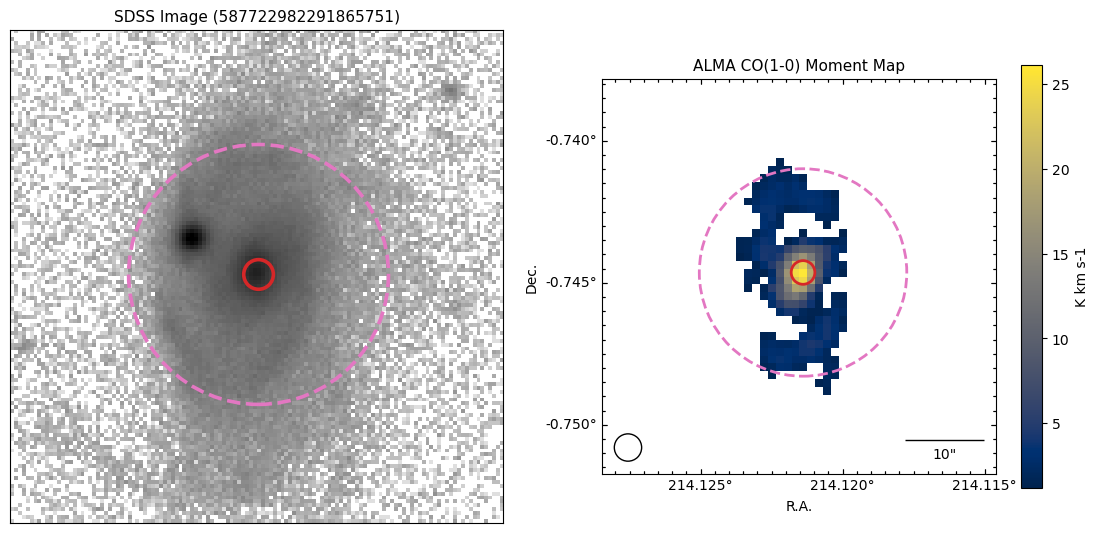

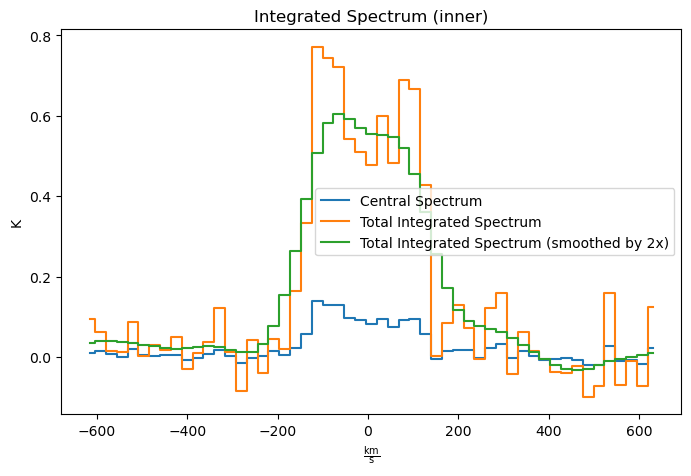

/arc/home/swilkinson/.local/lib/python3.11/site-packages/astropy/units/quantity.py:1843: RuntimeWarning: Degrees of freedom <= 0 for slice.
  return super().__array_function__(function, types, args, kwargs)


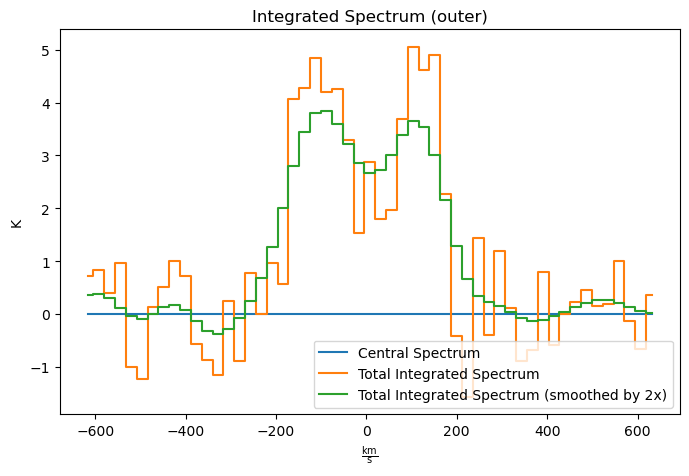

/arc/home/swilkinson/.local/lib/python3.11/site-packages/astropy/units/quantity.py:1843: RuntimeWarning: Degrees of freedom <= 0 for slice.
  return super().__array_function__(function, types, args, kwargs)


Total log10(MH2):  9.632097160769007
Inner log10(MH2):  8.804283349258288
Outer log10(MH2):  9.553892116653747
Inner (stacked) log10(MH2):  8.867104380069748
Outer (stacked) log10(MH2):  9.710204287232884

Inner SNR (stacked):  nan
Outer SNR (stacked):  nan

Fraction of pixels covered (inner):  1.0
Fraction of pixels covered (outer):  0.4203703703703704

587722982815236212
'resolution' from archive:  1.7362307625735327
/arc/projects/salvage/ALMA_reduction/phangs_pipeline/derived/587722982815236212/587722982815236212_12m_co10_MOMENTTYPE.fits
/arc/projects/salvage/ALMA_reduction/phangs_pipeline/derived/587722982815236212/587722982815236212_12m_co10_MOMENTTYPE.fits
587722982815236212 failed.
587722984438235345
'resolution' from archive:  1.0416516967691931
'BMAJ' from header:  1.3219411196322


/arc/projects/salvage/ALMA_reduction/salvage_post_processing_tools.py:634: RuntimeWarning: All-NaN slice encountered
  out = axes[1].imshow(moment_1 - np.nanmedian(moment_1), origin = 'lower', cmap = 'coolwarm')


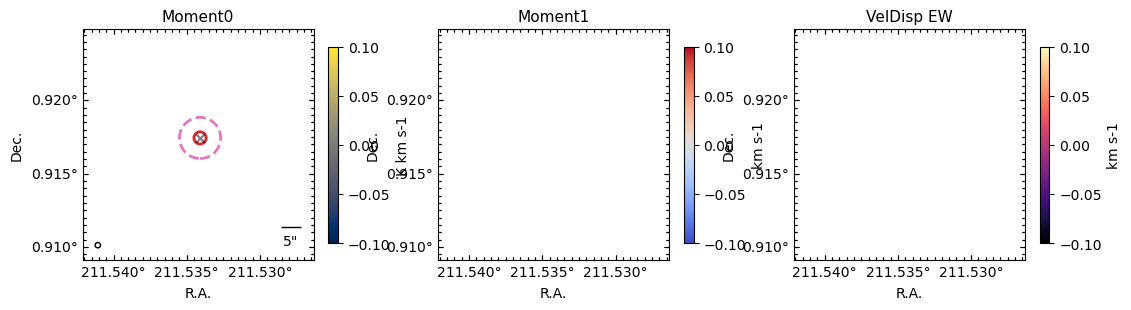

'BMAJ' from header:  1.3219411196322


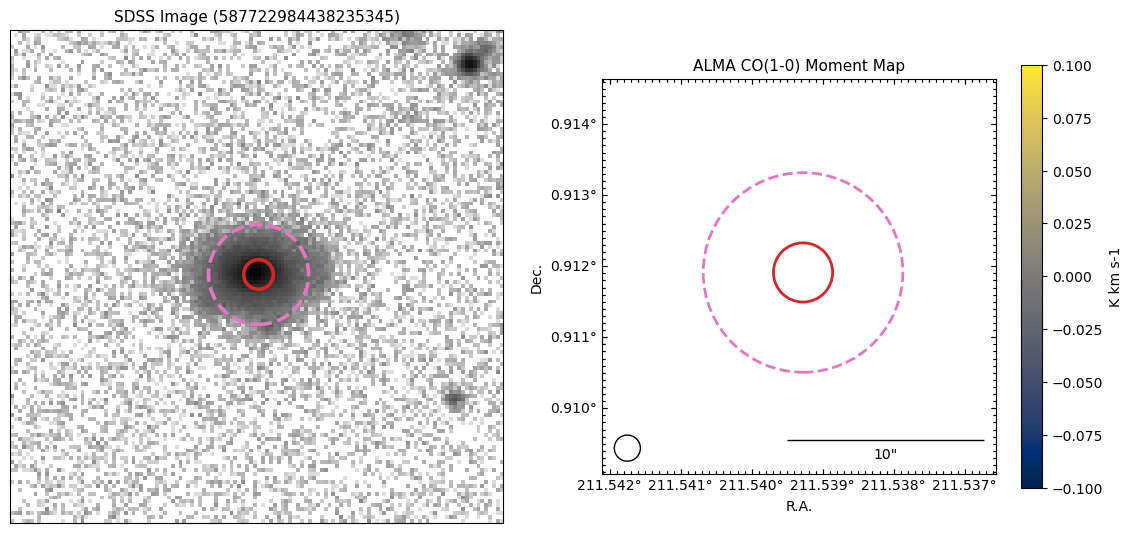

/tmp/ipykernel_30165/3600198945.py:34: RuntimeWarning: divide by zero encountered in log10
  M_H2, M_H2_err                             = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'total', a_CO = 4.35))
/tmp/ipykernel_30165/3600198945.py:35: RuntimeWarning: divide by zero encountered in log10
  M_H2_inner, M_H2_inner_err                 = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'inner', a_CO = 4.35))


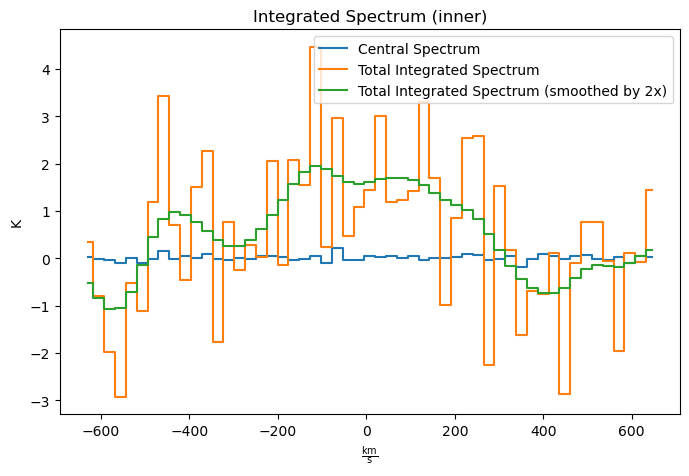

/arc/home/swilkinson/.local/lib/python3.11/site-packages/astropy/units/quantity.py:1843: RuntimeWarning: Degrees of freedom <= 0 for slice.
  return super().__array_function__(function, types, args, kwargs)
/tmp/ipykernel_30165/3600198945.py:37: RuntimeWarning: divide by zero encountered in log10
  M_H2_outer, M_H2_outer_err                 = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'outer', a_CO = 4.35))


In [ ]:
# wipe file
#outfile = '/arc/projects/salvage/ALMA_reduction/salvage-AGN-July21-sample_match-lt-4rp_mrs-gt-2rp_qa2-pass_no-inf-dups.out'
#out = open(outfile, 'w')
#out.write('#objID M_H2 M_H2_err M_H2_inner M_H2_inner_err M_H2_outer M_H2_outer_err M_H2_inner_stacked  M_H2_outer_stacked f_inner f_outer \n')
#out.close()

rerun_targets = ['588017992295972989', '588848899376939030']

for i in range(len(objID_sample)):

    ID = objID_sample[i]
    NAME = name_sample[i]
    Z = z_sample[i]
    M = mass_sample[i]
    R = rpetro_sample[i]
    RA = ra_sample[i]
    DEC = dec_sample[i]

    # running only on problem galaxies
    #if ID not in rerun_targets:
    #   continue

    print(ID)
    print('\'resolution\' from archive: ', res_sample[i])

    imagename = f'/arc/projects/salvage/ALMA_reduction/phangs_pipeline/derived/{ID}/{ID}_12m_co10_MOMENTTYPE.fits'
    
    try:
        
        demo_PHANGS_moments_annuli_wcs2(imagename, Z, RA, DEC, 2*R, ID)

        demo_image_and_moment_separate(imagename, Z, RA, DEC, 2*R, ID)

        M_H2, M_H2_err                             = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'total', a_CO = 4.35))
        M_H2_inner, M_H2_inner_err                 = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'inner', a_CO = 4.35))
        M_H2_inner_stacked, M_H2_inner_stacked_err = np.log10(MH2_from_cube(ID, Z, RA, DEC, 2*R, mask_type = 'inner', a_CO = 4.35))
        M_H2_outer, M_H2_outer_err                 = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'outer', a_CO = 4.35))
        M_H2_outer_stacked, M_H2_outer_stacked_err = np.log10(MH2_from_cube(ID, Z, RA, DEC, 2*R, mask_type = 'outer', a_CO = 4.35))

        print('Total log10(MH2): ', M_H2)
        print('Inner log10(MH2): ', M_H2_inner)
        print('Outer log10(MH2): ', M_H2_outer)
        print('Inner (stacked) log10(MH2): ', M_H2_inner_stacked)
        print('Outer (stacked) log10(MH2): ', M_H2_outer_stacked)
        print()

        print('Inner SNR (stacked): ', 10**M_H2_inner_stacked / 10**M_H2_inner_stacked_err)
        print('Outer SNR (stacked): ', 10**M_H2_outer_stacked / 10**M_H2_outer_stacked_err)
        print()

        f_inner, f_outer = mom0_pixel_coverage(ID, Z, RA, DEC, 2*R)

        print('Fraction of pixels covered (inner): ', f_inner)
        print('Fraction of pixels covered (outer): ', f_outer)
        print()

        # output to file
        #out = open(outfile, 'a')
        #out.write(f'{ID} {M_H2} {M_H2_err} {M_H2_inner} {M_H2_inner_err} {M_H2_outer} {M_H2_outer_err} {M_H2_inner_stacked} {M_H2_outer_stacked} {f_inner} {f_outer}\n')
        #out.close()

        mom0_pixel_coverage(ID, Z, RA, DEC, 2*R)

    except:

        print(ID, 'failed.')

        

In [15]:
rerun_targets = ['587724197746311240', '588848899376939030']

for i in range(len(objID_sample)):

    ID = objID_sample[i]
    NAME = name_sample[i]
    Z = z_sample[i]
    M = mass_sample[i]
    R = rpetro_sample[i]
    RA = ra_sample[i]
    DEC = dec_sample[i]

    # running only on problem galaxies
    if ID not in rerun_targets:
       continue

    print(ID)
    print('\'resolution\' from archive: ', res_sample[i])

    imagename = f'/arc/projects/salvage/ALMA_reduction/phangs_pipeline/derived/{ID}/{ID}_12m_co10_MOMENTTYPE.fits'
    
    try:
        
        #demo_PHANGS_moments_annuli_wcs2(imagename, Z, RA, DEC, 2*R, ID)

        #demo_image_and_moment_separate(imagename, Z, RA, DEC, 2*R, ID)

        M_H2, M_H2_err             = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'total', a_CO = 4.35              ))
        M_H2_inner, M_H2_inner_err = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'inner', a_CO = 4.35              ))
        M_H2_inner_stacked         = np.log10(MH2_from_cube(ID, Z, RA, DEC, 2*R, mask_type = 'inner', a_CO = 4.35, view = False))
        M_H2_outer, M_H2_outer_err = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'outer', a_CO = 4.35              ))
        M_H2_outer_stacked         = np.log10(MH2_from_cube(ID, Z, RA, DEC, 2*R, mask_type = 'outer', a_CO = 4.35, view = False))

        print('Total log10(MH2): ', M_H2)
        print('Inner log10(MH2): ', M_H2_inner)
        print('Outer log10(MH2): ', M_H2_outer)
        print('Inner (stacked) log10(MH2): ', M_H2_inner_stacked)
        print('Outer (stacked) log10(MH2): ', M_H2_outer_stacked)
        print()

        f_inner, f_outer = mom0_pixel_coverage(ID, Z, RA, DEC, 2*R)

        print('Fraction of pixels covered (inner): ', f_inner)
        print('Fraction of pixels covered (outer): ', f_outer)
        print()

    except:

        print(ID, 'failed.')

587724197746311240
'resolution' from archive:  1.7412283477228174
'BMAJ' from header:  1.97917576900776

'BMAJ' from header:  1.97917576900776
'BMAJ' from header:  1.97917576900776
Total log10(MH2):  9.96338526812717
Inner log10(MH2):  9.673080888159047
Outer log10(MH2):  9.651358062460515
Inner (stacked) log10(MH2):  9.681940707558063
Outer (stacked) log10(MH2):  9.846568915014235

Fraction of pixels covered (inner):  1.0
Fraction of pixels covered (outer):  0.1221476510067114

588848899376939030
'resolution' from archive:  1.505813204551398
'BMAJ' from header:  1.7547375467556001

'BMAJ' from header:  1.7547375467556001
'BMAJ' from header:  1.7547375467556001
Total log10(MH2):  9.46655755351427
Inner log10(MH2):  8.989733907260945
Outer log10(MH2):  9.290317371384866
Inner (stacked) log10(MH2):  9.01966504788928
Outer (stacked) log10(MH2):  9.459314212102994

Fraction of pixels covered (inner):  1.0
Fraction of pixels covered (outer):  0.19351179673321234



587722982291865751
'resolution' from archive:  2.6683100162968527



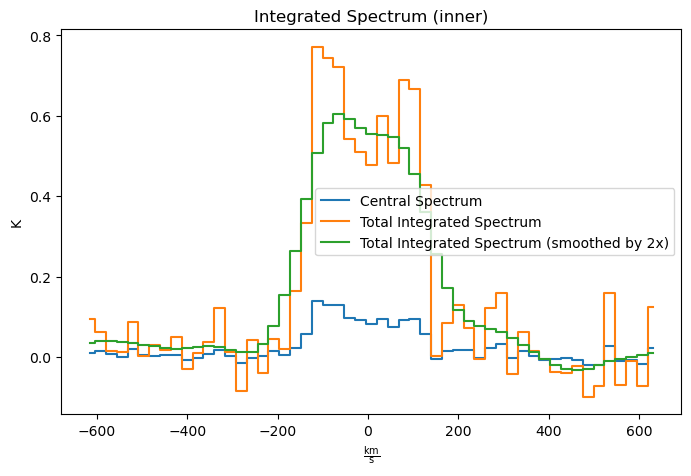

/arc/home/swilkinson/.local/lib/python3.11/site-packages/astropy/units/quantity.py:1843: RuntimeWarning: Degrees of freedom <= 0 for slice.
  return super().__array_function__(function, types, args, kwargs)


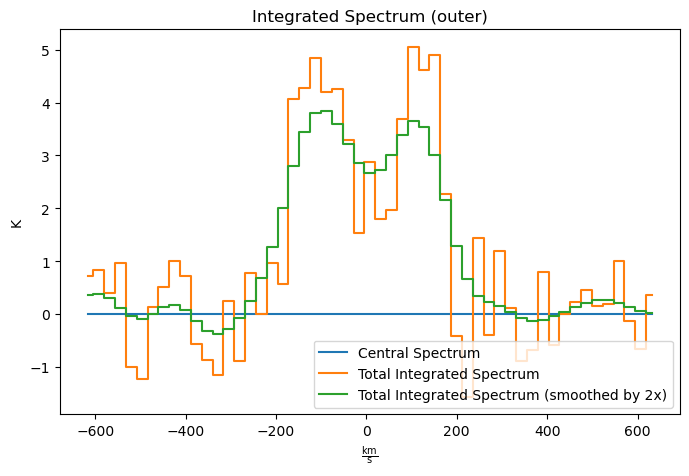

/arc/home/swilkinson/.local/lib/python3.11/site-packages/astropy/units/quantity.py:1843: RuntimeWarning: Degrees of freedom <= 0 for slice.
  return super().__array_function__(function, types, args, kwargs)
/tmp/ipykernel_110/393836164.py:36: RuntimeWarning: divide by zero encountered in log10
  M_H2, M_H2_err                             = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'total', a_CO = 4.35))


Total log10(MH2):  9.632097160769007
Inner log10(MH2):  8.804283349258288
Outer log10(MH2):  9.553892116653747
Inner (stacked) log10(MH2):  8.867104380069748
Outer (stacked) log10(MH2):  9.710204287232884

Fraction of pixels covered (inner):  1.0
Fraction of pixels covered (outer):  0.4203703703703704

587722982815236212
'resolution' from archive:  1.7362307625735327
587722982815236212 failed.
587722984438235345
'resolution' from archive:  1.0416516967691931



/tmp/ipykernel_110/393836164.py:37: RuntimeWarning: divide by zero encountered in log10
  M_H2_inner, M_H2_inner_err                 = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'inner', a_CO = 4.35))


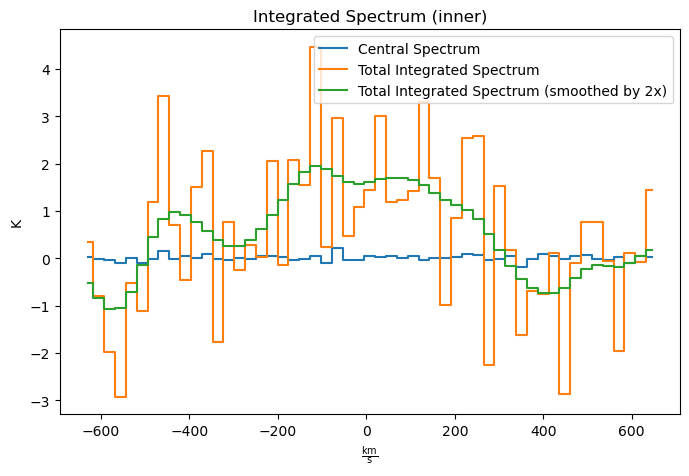

/arc/home/swilkinson/.local/lib/python3.11/site-packages/astropy/units/quantity.py:1843: RuntimeWarning: Degrees of freedom <= 0 for slice.
  return super().__array_function__(function, types, args, kwargs)
/tmp/ipykernel_110/393836164.py:39: RuntimeWarning: divide by zero encountered in log10
  M_H2_outer, M_H2_outer_err                 = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'outer', a_CO = 4.35))


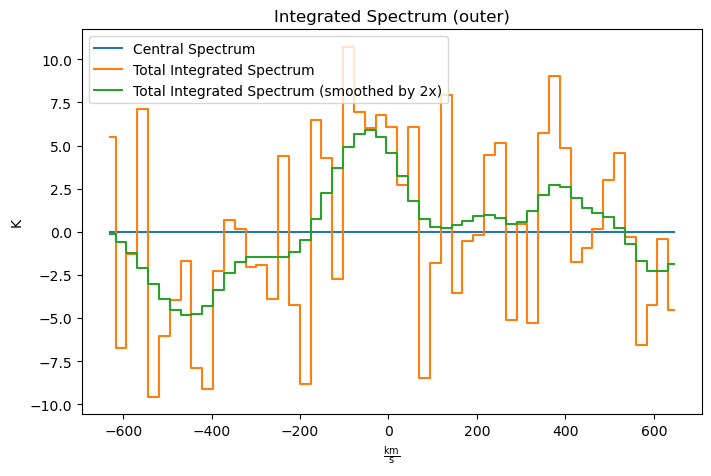

/arc/home/swilkinson/.local/lib/python3.11/site-packages/astropy/units/quantity.py:1843: RuntimeWarning: Degrees of freedom <= 0 for slice.
  return super().__array_function__(function, types, args, kwargs)


Total log10(MH2):  -inf
Inner log10(MH2):  -inf
Outer log10(MH2):  -inf
Inner (stacked) log10(MH2):  8.92868720682096
Outer (stacked) log10(MH2):  8.002008866964095

Fraction of pixels covered (inner):  0.0
Fraction of pixels covered (outer):  0.0

587722984440135850
'resolution' from archive:  1.0196369154833484



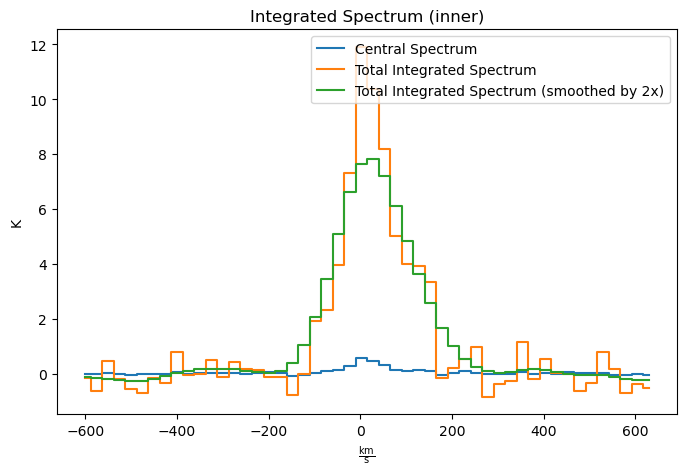

/arc/home/swilkinson/.local/lib/python3.11/site-packages/astropy/units/quantity.py:1843: RuntimeWarning: Degrees of freedom <= 0 for slice.
  return super().__array_function__(function, types, args, kwargs)


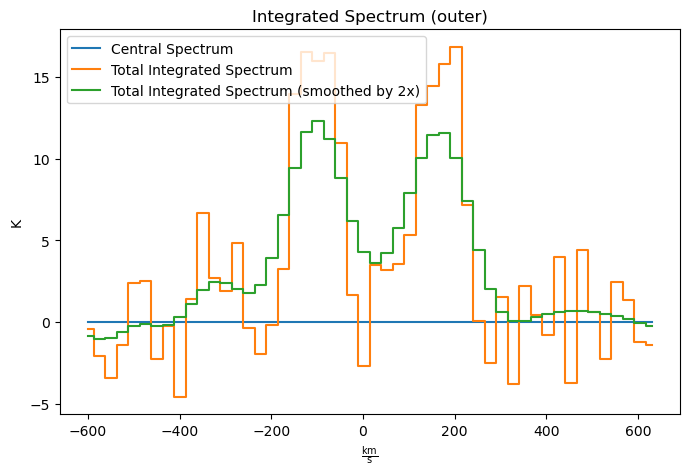

/arc/home/swilkinson/.local/lib/python3.11/site-packages/astropy/units/quantity.py:1843: RuntimeWarning: Degrees of freedom <= 0 for slice.
  return super().__array_function__(function, types, args, kwargs)


Total log10(MH2):  9.318186034883569
Inner log10(MH2):  8.785390153410614
Outer log10(MH2):  9.16574519576297
Inner (stacked) log10(MH2):  8.806591292798098
Outer (stacked) log10(MH2):  9.243846562676104

Fraction of pixels covered (inner):  0.9166666666666666
Fraction of pixels covered (outer):  0.15354330708661418

587722984441250023
'resolution' from archive:  1.0556159421523095



/tmp/ipykernel_110/393836164.py:36: RuntimeWarning: divide by zero encountered in log10
  M_H2, M_H2_err                             = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'total', a_CO = 4.35))
/tmp/ipykernel_110/393836164.py:37: RuntimeWarning: divide by zero encountered in log10
  M_H2_inner, M_H2_inner_err                 = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'inner', a_CO = 4.35))


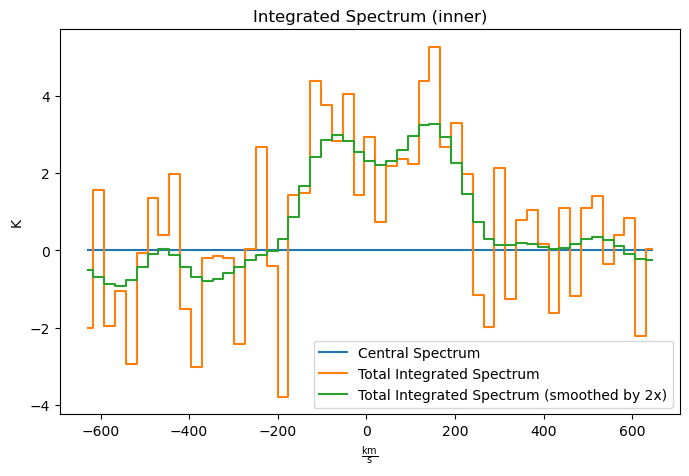

/arc/home/swilkinson/.local/lib/python3.11/site-packages/astropy/units/quantity.py:1843: RuntimeWarning: Degrees of freedom <= 0 for slice.
  return super().__array_function__(function, types, args, kwargs)
/tmp/ipykernel_110/393836164.py:39: RuntimeWarning: divide by zero encountered in log10
  M_H2_outer, M_H2_outer_err                 = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'outer', a_CO = 4.35))


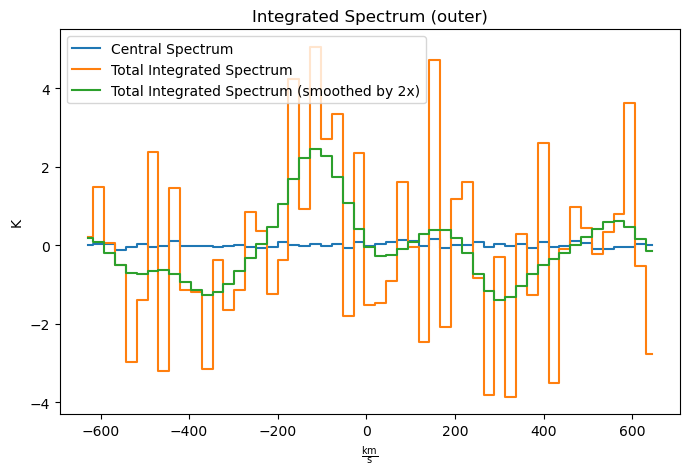

/arc/home/swilkinson/.local/lib/python3.11/site-packages/astropy/units/quantity.py:1843: RuntimeWarning: Degrees of freedom <= 0 for slice.
  return super().__array_function__(function, types, args, kwargs)
/tmp/ipykernel_110/393836164.py:40: RuntimeWarning: invalid value encountered in log10
  M_H2_outer_stacked, M_H2_outer_stacked_err = np.log10(MH2_from_cube(ID, Z, RA, DEC, 2*R, mask_type = 'outer', a_CO = 4.35))


Total log10(MH2):  -inf
Inner log10(MH2):  -inf
Outer log10(MH2):  -inf
Inner (stacked) log10(MH2):  8.993819395400266
Outer (stacked) log10(MH2):  nan

Fraction of pixels covered (inner):  0.0
Fraction of pixels covered (outer):  0.0

587724197746311240
'resolution' from archive:  1.7412283477228174



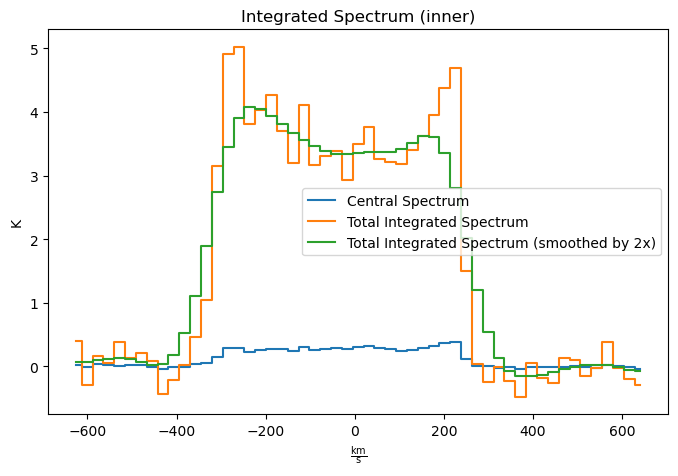

/arc/home/swilkinson/.local/lib/python3.11/site-packages/astropy/units/quantity.py:1843: RuntimeWarning: Degrees of freedom <= 0 for slice.
  return super().__array_function__(function, types, args, kwargs)


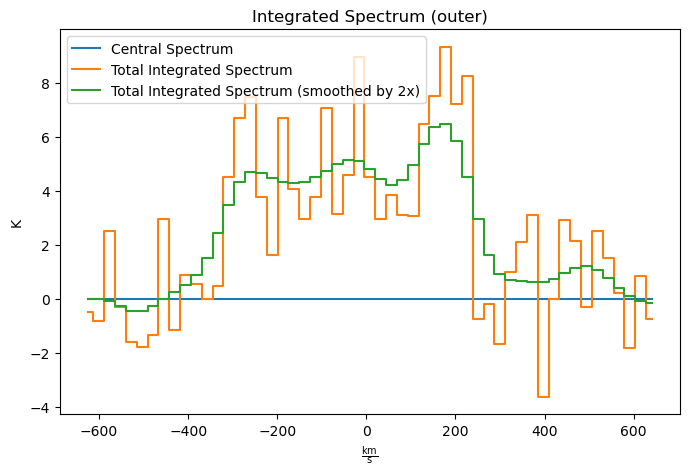

/arc/home/swilkinson/.local/lib/python3.11/site-packages/astropy/units/quantity.py:1843: RuntimeWarning: Degrees of freedom <= 0 for slice.
  return super().__array_function__(function, types, args, kwargs)


Total log10(MH2):  9.96338526812717
Inner log10(MH2):  9.673080888159047
Outer log10(MH2):  9.651358062460515
Inner (stacked) log10(MH2):  9.681940707558065
Outer (stacked) log10(MH2):  9.846568915014235

Fraction of pixels covered (inner):  1.0
Fraction of pixels covered (outer):  0.1221476510067114

587724198283247682
'resolution' from archive:  2.054806053631158



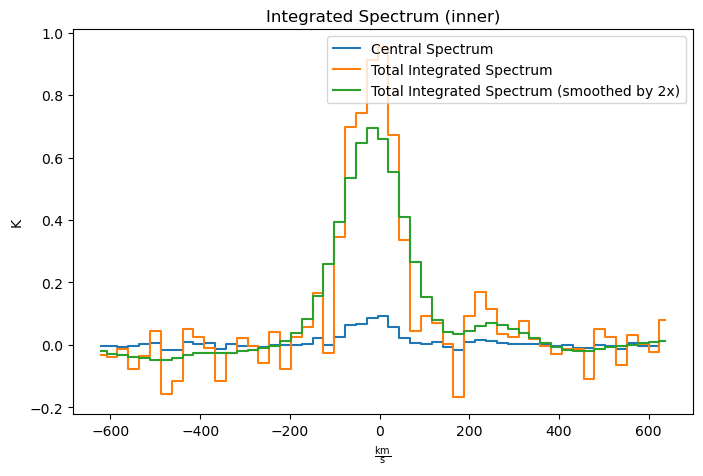

/arc/home/swilkinson/.local/lib/python3.11/site-packages/astropy/units/quantity.py:1843: RuntimeWarning: Degrees of freedom <= 0 for slice.
  return super().__array_function__(function, types, args, kwargs)


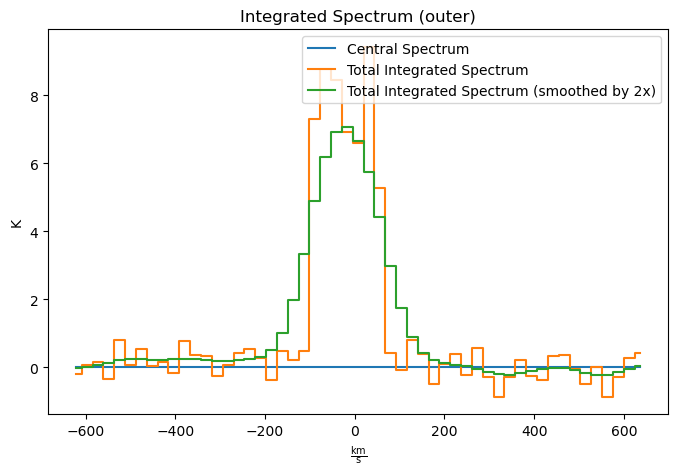

/arc/home/swilkinson/.local/lib/python3.11/site-packages/astropy/units/quantity.py:1843: RuntimeWarning: Degrees of freedom <= 0 for slice.
  return super().__array_function__(function, types, args, kwargs)


Total log10(MH2):  9.512827103916205
Inner log10(MH2):  8.42698617768276
Outer log10(MH2):  9.43933774314818
Inner (stacked) log10(MH2):  8.453361233411037
Outer (stacked) log10(MH2):  9.524354609730484

Fraction of pixels covered (inner):  1.0
Fraction of pixels covered (outer):  0.6748466257668712

587724232639774853
'resolution' from archive:  1.2271762828963841

587724232639774853 failed.
587724234256351256
'resolution' from archive:  1.6948620997537394



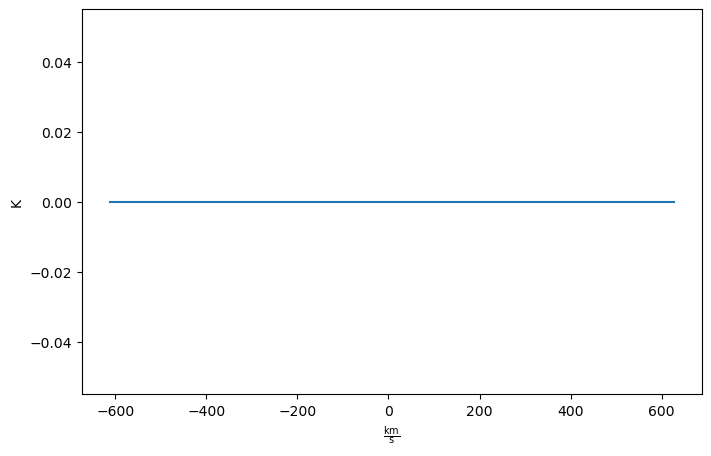

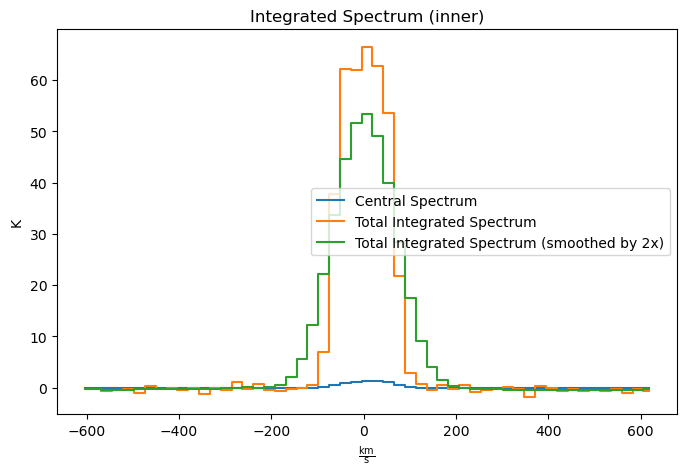

/arc/home/swilkinson/.local/lib/python3.11/site-packages/astropy/units/quantity.py:1843: RuntimeWarning: Degrees of freedom <= 0 for slice.
  return super().__array_function__(function, types, args, kwargs)


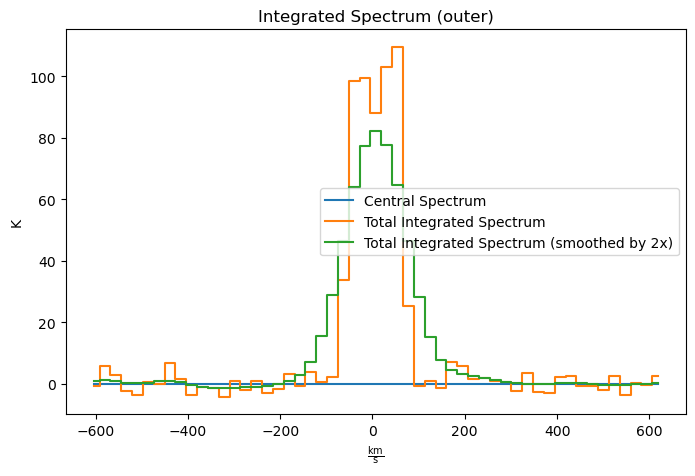

/arc/home/swilkinson/.local/lib/python3.11/site-packages/astropy/units/quantity.py:1843: RuntimeWarning: Degrees of freedom <= 0 for slice.
  return super().__array_function__(function, types, args, kwargs)


Total log10(MH2):  9.372116435741738
Inner log10(MH2):  8.993782710465611
Outer log10(MH2):  9.111993347729015
Inner (stacked) log10(MH2):  8.980795215457462
Outer (stacked) log10(MH2):  9.182134776194678

Fraction of pixels covered (inner):  1.0
Fraction of pixels covered (outer):  0.5296122709842352

587724240159834264
'resolution' from archive:  2.128994489859118



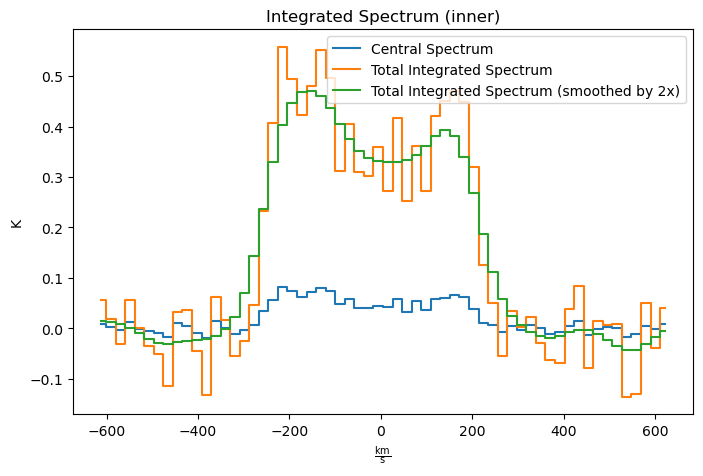

/arc/home/swilkinson/.local/lib/python3.11/site-packages/astropy/units/quantity.py:1843: RuntimeWarning: Degrees of freedom <= 0 for slice.
  return super().__array_function__(function, types, args, kwargs)


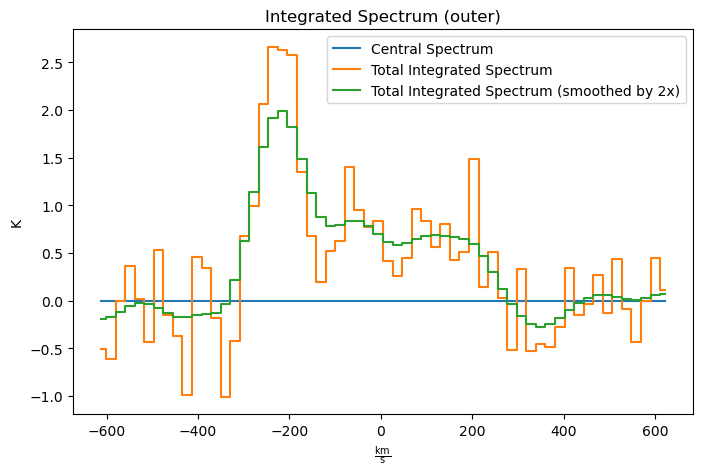

/arc/home/swilkinson/.local/lib/python3.11/site-packages/astropy/units/quantity.py:1843: RuntimeWarning: Degrees of freedom <= 0 for slice.
  return super().__array_function__(function, types, args, kwargs)


Total log10(MH2):  8.758645538283073
Inner log10(MH2):  8.305438469117595
Outer log10(MH2):  8.57008448960212
Inner (stacked) log10(MH2):  8.297291955427697
Outer (stacked) log10(MH2):  8.702436765999098

Fraction of pixels covered (inner):  1.0
Fraction of pixels covered (outer):  0.21014492753623187

587724240699064558
'resolution' from archive:  0.6307372619859198



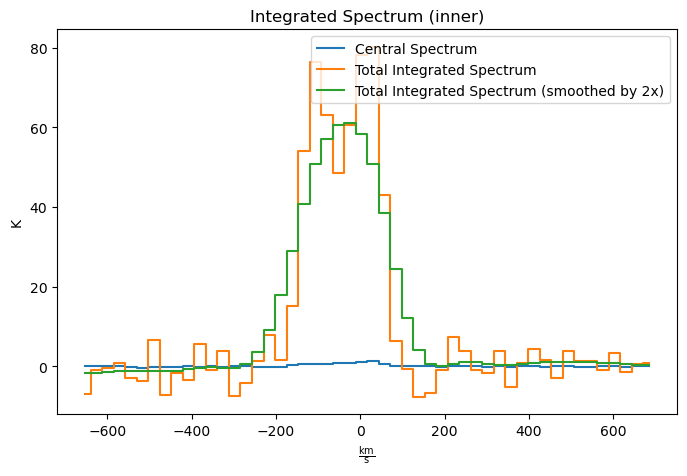

/arc/home/swilkinson/.local/lib/python3.11/site-packages/astropy/units/quantity.py:1843: RuntimeWarning: Degrees of freedom <= 0 for slice.
  return super().__array_function__(function, types, args, kwargs)


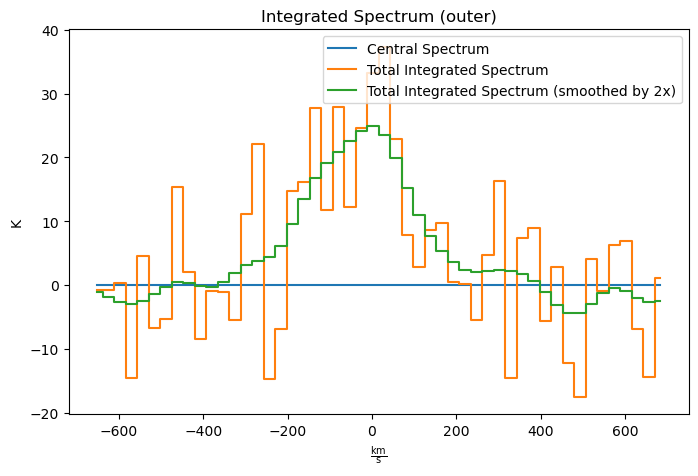

/arc/home/swilkinson/.local/lib/python3.11/site-packages/astropy/units/quantity.py:1843: RuntimeWarning: Degrees of freedom <= 0 for slice.
  return super().__array_function__(function, types, args, kwargs)


Total log10(MH2):  10.109403958882604
Inner log10(MH2):  10.031956705813318
Outer log10(MH2):  9.322477449433835
Inner (stacked) log10(MH2):  10.067143796843268
Outer (stacked) log10(MH2):  9.711044707418976

Fraction of pixels covered (inner):  1.0
Fraction of pixels covered (outer):  0.19340974212034384

587725073918722287
'resolution' from archive:  2.3897436655576314



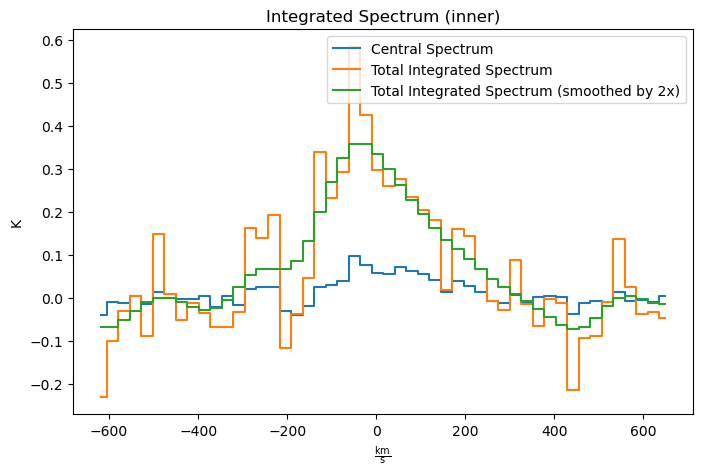

/arc/home/swilkinson/.local/lib/python3.11/site-packages/astropy/units/quantity.py:1843: RuntimeWarning: Degrees of freedom <= 0 for slice.
  return super().__array_function__(function, types, args, kwargs)


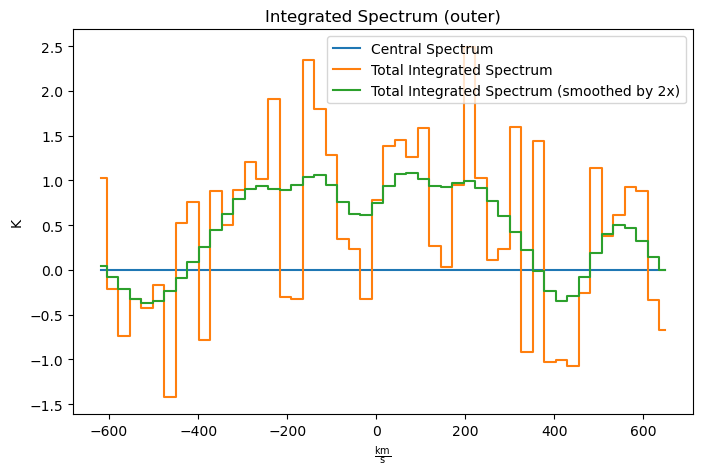

/arc/home/swilkinson/.local/lib/python3.11/site-packages/astropy/units/quantity.py:1843: RuntimeWarning: Degrees of freedom <= 0 for slice.
  return super().__array_function__(function, types, args, kwargs)


Total log10(MH2):  9.306866733711066
Inner log10(MH2):  8.66286283616482
Outer log10(MH2):  9.190180828311966
Inner (stacked) log10(MH2):  8.774800639849936
Outer (stacked) log10(MH2):  9.636924026730087

Fraction of pixels covered (inner):  0.9333333333333333
Fraction of pixels covered (outer):  0.18385650224215247

587725073918722357
'resolution' from archive:  2.388514897139765



/tmp/ipykernel_110/393836164.py:36: RuntimeWarning: divide by zero encountered in log10
  M_H2, M_H2_err                             = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'total', a_CO = 4.35))
/tmp/ipykernel_110/393836164.py:37: RuntimeWarning: divide by zero encountered in log10
  M_H2_inner, M_H2_inner_err                 = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'inner', a_CO = 4.35))


587725073918722357 failed.
587725074453627099
'resolution' from archive:  2.159605121624308



/tmp/ipykernel_110/393836164.py:36: RuntimeWarning: divide by zero encountered in log10
  M_H2, M_H2_err                             = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'total', a_CO = 4.35))
/tmp/ipykernel_110/393836164.py:37: RuntimeWarning: divide by zero encountered in log10
  M_H2_inner, M_H2_inner_err                 = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'inner', a_CO = 4.35))


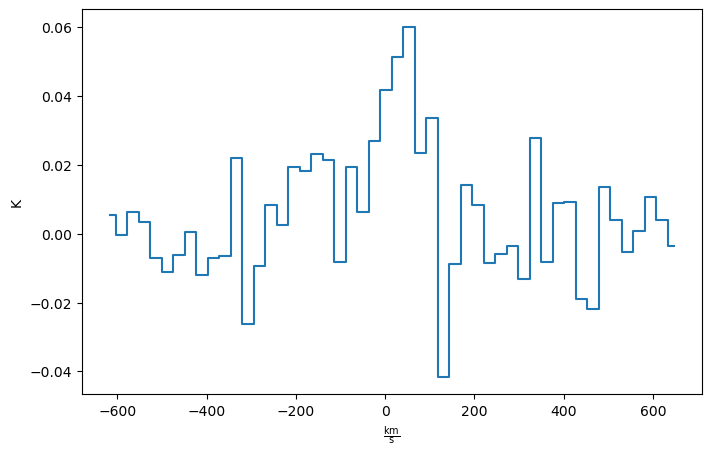

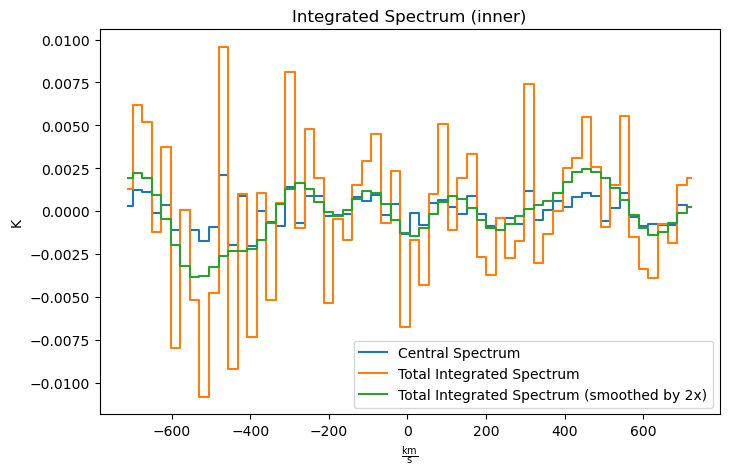

/arc/home/swilkinson/.local/lib/python3.11/site-packages/astropy/units/quantity.py:1843: RuntimeWarning: Degrees of freedom <= 0 for slice.
  return super().__array_function__(function, types, args, kwargs)
/tmp/ipykernel_110/393836164.py:39: RuntimeWarning: divide by zero encountered in log10
  M_H2_outer, M_H2_outer_err                 = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'outer', a_CO = 4.35))


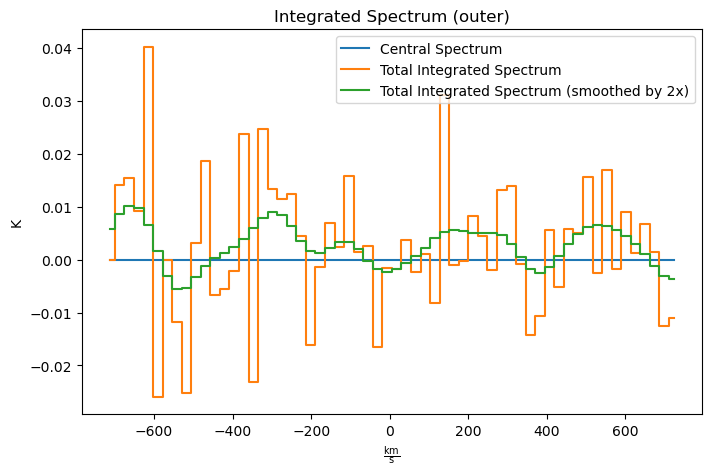

/arc/home/swilkinson/.local/lib/python3.11/site-packages/astropy/units/quantity.py:1843: RuntimeWarning: Degrees of freedom <= 0 for slice.
  return super().__array_function__(function, types, args, kwargs)
/tmp/ipykernel_110/393836164.py:40: RuntimeWarning: invalid value encountered in log10
  M_H2_outer_stacked, M_H2_outer_stacked_err = np.log10(MH2_from_cube(ID, Z, RA, DEC, 2*R, mask_type = 'outer', a_CO = 4.35))


Total log10(MH2):  -inf
Inner log10(MH2):  -inf
Outer log10(MH2):  -inf
Inner (stacked) log10(MH2):  6.68462768602847
Outer (stacked) log10(MH2):  nan

Fraction of pixels covered (inner):  0.0
Fraction of pixels covered (outer):  0.0

587725074455724392
'resolution' from archive:  2.3935289720465396



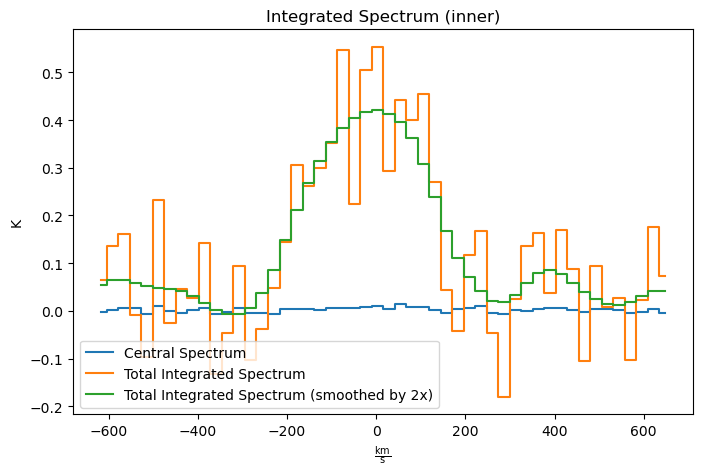

/arc/home/swilkinson/.local/lib/python3.11/site-packages/astropy/units/quantity.py:1843: RuntimeWarning: Degrees of freedom <= 0 for slice.
  return super().__array_function__(function, types, args, kwargs)


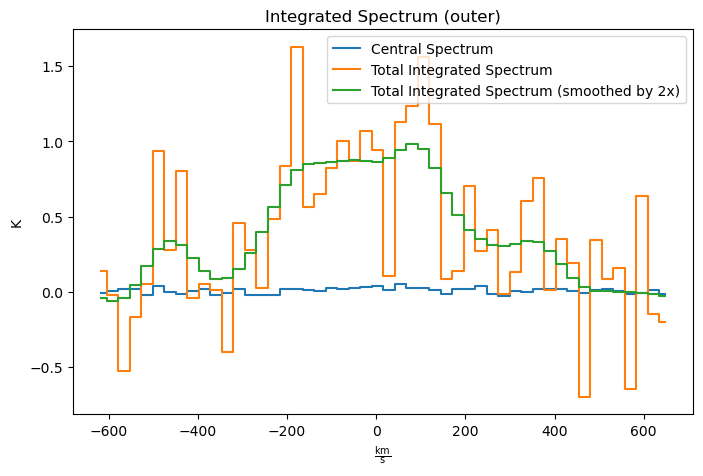

/arc/home/swilkinson/.local/lib/python3.11/site-packages/astropy/units/quantity.py:1843: RuntimeWarning: Degrees of freedom <= 0 for slice.
  return super().__array_function__(function, types, args, kwargs)


Total log10(MH2):  8.967711316225305
Inner log10(MH2):  8.669420997826604
Outer log10(MH2):  8.663924244436465
Inner (stacked) log10(MH2):  9.072214500458916
Outer (stacked) log10(MH2):  9.544325362355812

Fraction of pixels covered (inner):  0.8
Fraction of pixels covered (outer):  0.2631578947368421

587725074990235725
'resolution' from archive:  2.3460206212102914



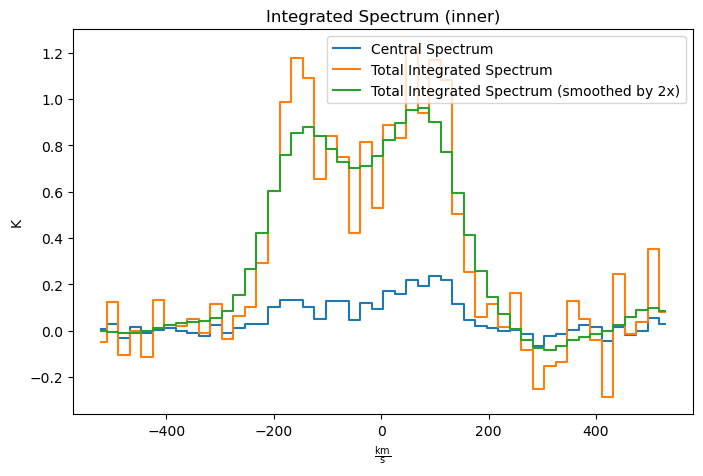

/arc/home/swilkinson/.local/lib/python3.11/site-packages/astropy/units/quantity.py:1843: RuntimeWarning: Degrees of freedom <= 0 for slice.
  return super().__array_function__(function, types, args, kwargs)


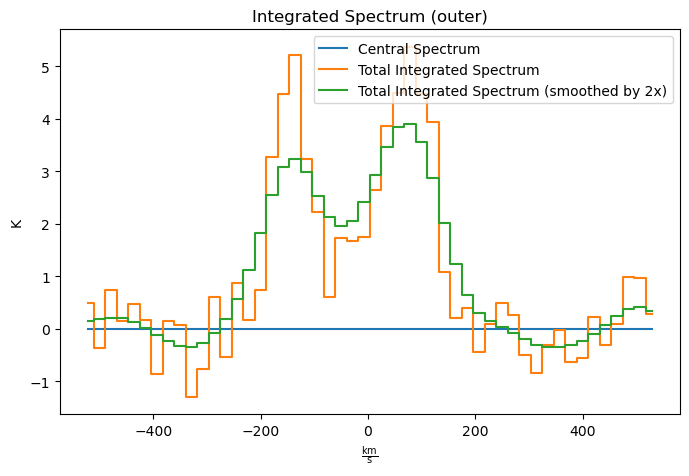

/arc/home/swilkinson/.local/lib/python3.11/site-packages/astropy/units/quantity.py:1843: RuntimeWarning: Degrees of freedom <= 0 for slice.
  return super().__array_function__(function, types, args, kwargs)


Total log10(MH2):  9.68641811929965
Inner log10(MH2):  9.127972967758321
Outer log10(MH2):  9.536876696598682
Inner (stacked) log10(MH2):  9.180645326844697
Outer (stacked) log10(MH2):  9.696465310811957

Fraction of pixels covered (inner):  1.0
Fraction of pixels covered (outer):  0.6931818181818182

587725075528417541
'resolution' from archive:  1.579917875954526



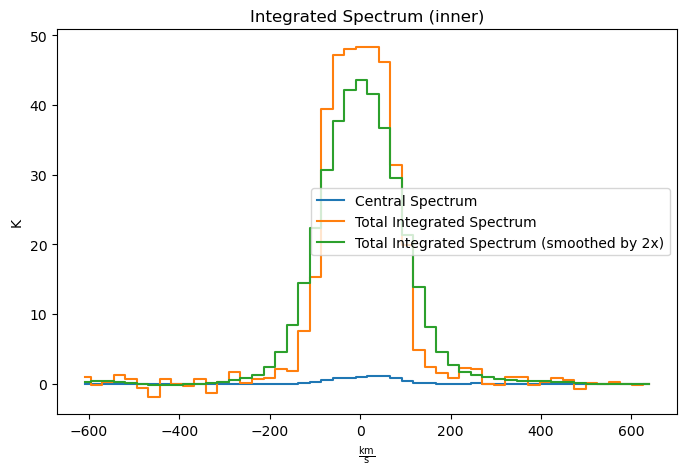

/arc/home/swilkinson/.local/lib/python3.11/site-packages/astropy/units/quantity.py:1843: RuntimeWarning: Degrees of freedom <= 0 for slice.
  return super().__array_function__(function, types, args, kwargs)


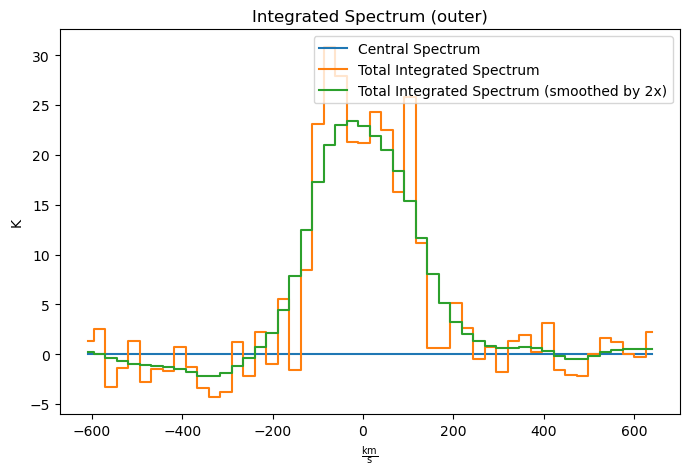

/arc/home/swilkinson/.local/lib/python3.11/site-packages/astropy/units/quantity.py:1843: RuntimeWarning: Degrees of freedom <= 0 for slice.
  return super().__array_function__(function, types, args, kwargs)


Total log10(MH2):  9.75319061840411
Inner log10(MH2):  9.576127865032321
Outer log10(MH2):  9.274769642766826
Inner (stacked) log10(MH2):  9.59972088663594
Outer (stacked) log10(MH2):  9.39158304103158

Fraction of pixels covered (inner):  1.0
Fraction of pixels covered (outer):  0.4906166219839142

587726013996466476
'resolution' from archive:  2.415062196163024



/tmp/ipykernel_110/393836164.py:36: RuntimeWarning: divide by zero encountered in log10
  M_H2, M_H2_err                             = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'total', a_CO = 4.35))
/tmp/ipykernel_110/393836164.py:37: RuntimeWarning: divide by zero encountered in log10
  M_H2_inner, M_H2_inner_err                 = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'inner', a_CO = 4.35))


587726013996466476 failed.
587726014011539630
'resolution' from archive:  1.0303475654624696

587726014011539630 failed.
587726014546641125
'resolution' from archive:  1.0030032267623359



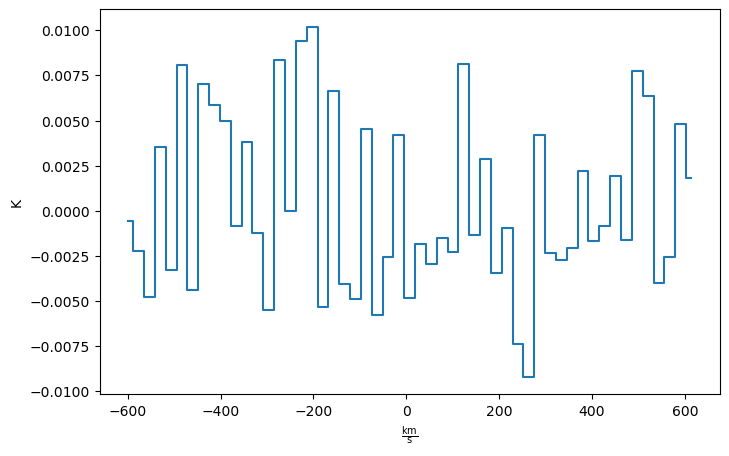

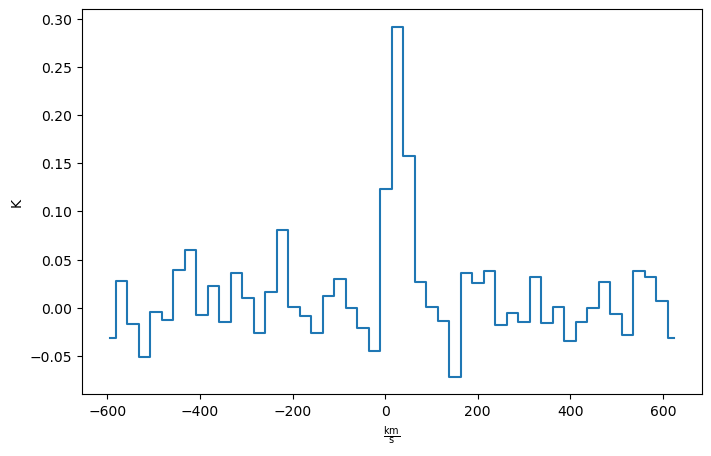

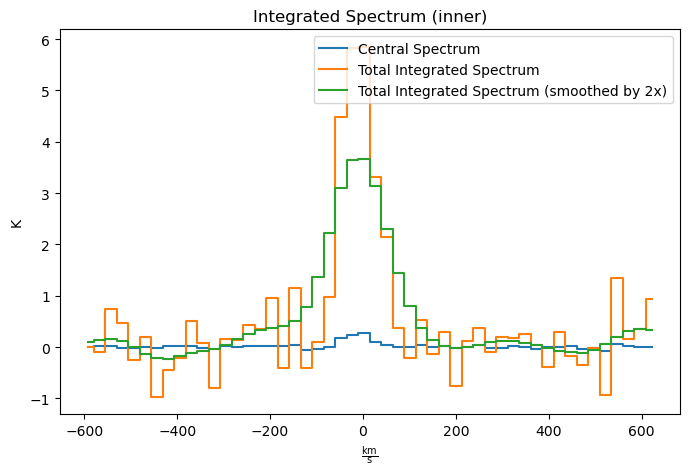

/arc/home/swilkinson/.local/lib/python3.11/site-packages/astropy/units/quantity.py:1843: RuntimeWarning: Degrees of freedom <= 0 for slice.
  return super().__array_function__(function, types, args, kwargs)


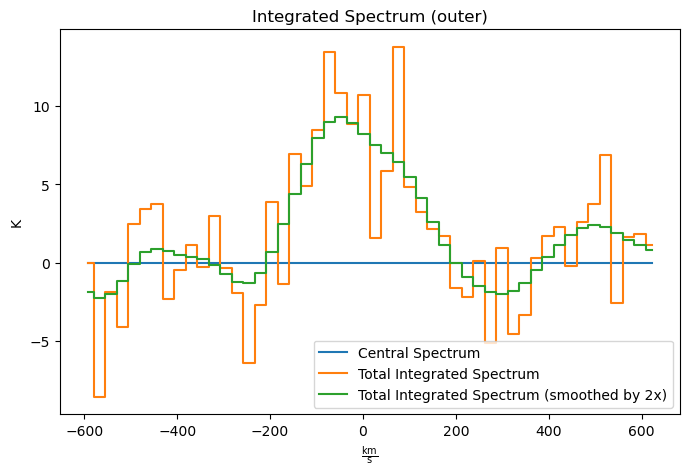

/arc/home/swilkinson/.local/lib/python3.11/site-packages/astropy/units/quantity.py:1843: RuntimeWarning: Degrees of freedom <= 0 for slice.
  return super().__array_function__(function, types, args, kwargs)


Total log10(MH2):  8.40423051084541
Inner log10(MH2):  7.979583973561168
Outer log10(MH2):  8.199315251457026
Inner (stacked) log10(MH2):  8.084640584886277
Outer (stacked) log10(MH2):  8.603002465664835

Fraction of pixels covered (inner):  0.7
Fraction of pixels covered (outer):  0.058703420112302195

587726014548476140
'resolution' from archive:  1.042691947961189



/tmp/ipykernel_110/393836164.py:36: RuntimeWarning: divide by zero encountered in log10
  M_H2, M_H2_err                             = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'total', a_CO = 4.35))
/tmp/ipykernel_110/393836164.py:37: RuntimeWarning: divide by zero encountered in log10
  M_H2_inner, M_H2_inner_err                 = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'inner', a_CO = 4.35))


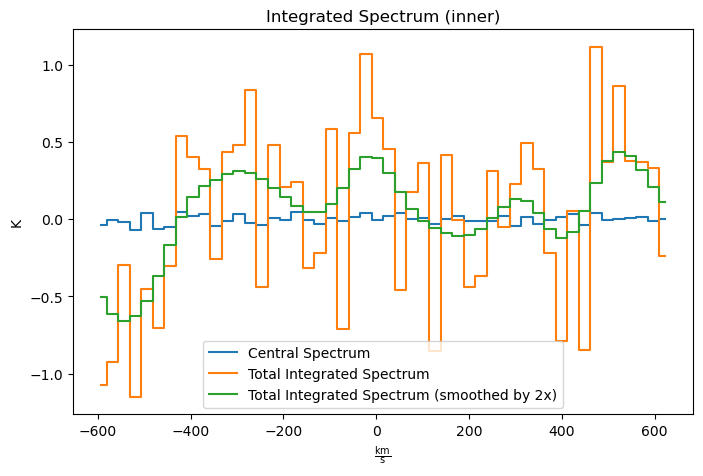

/arc/home/swilkinson/.local/lib/python3.11/site-packages/astropy/units/quantity.py:1843: RuntimeWarning: Degrees of freedom <= 0 for slice.
  return super().__array_function__(function, types, args, kwargs)
/tmp/ipykernel_110/393836164.py:39: RuntimeWarning: divide by zero encountered in log10
  M_H2_outer, M_H2_outer_err                 = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'outer', a_CO = 4.35))


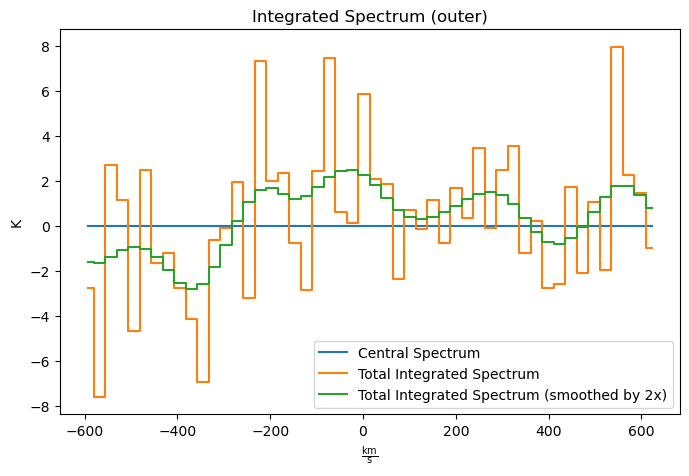

/arc/home/swilkinson/.local/lib/python3.11/site-packages/astropy/units/quantity.py:1843: RuntimeWarning: Degrees of freedom <= 0 for slice.
  return super().__array_function__(function, types, args, kwargs)


Total log10(MH2):  -inf
Inner log10(MH2):  -inf
Outer log10(MH2):  -inf
Inner (stacked) log10(MH2):  6.986921779587894
Outer (stacked) log10(MH2):  7.836350964958857

Fraction of pixels covered (inner):  0.0
Fraction of pixels covered (outer):  0.0

587726014550704284
'resolution' from archive:  1.7306559707937716



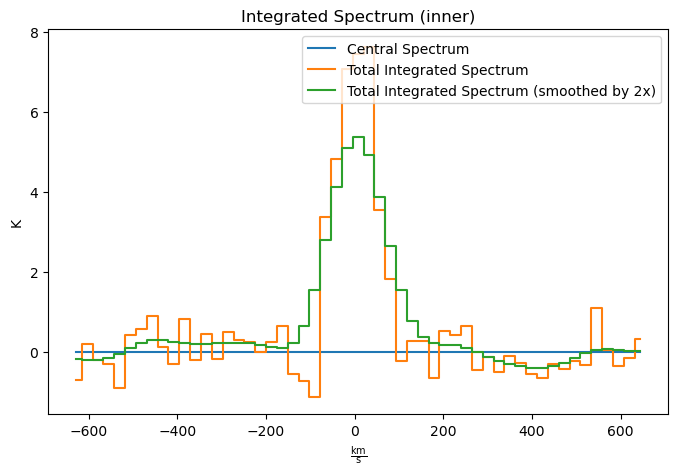

/arc/home/swilkinson/.local/lib/python3.11/site-packages/astropy/units/quantity.py:1843: RuntimeWarning: Degrees of freedom <= 0 for slice.
  return super().__array_function__(function, types, args, kwargs)


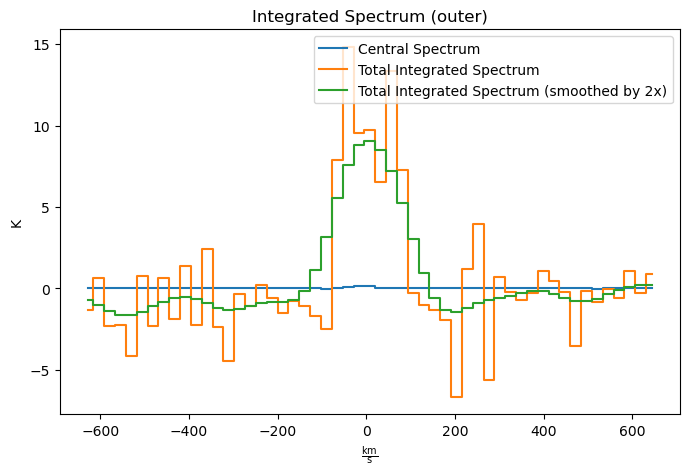

/arc/home/swilkinson/.local/lib/python3.11/site-packages/astropy/units/quantity.py:1843: RuntimeWarning: Degrees of freedom <= 0 for slice.
  return super().__array_function__(function, types, args, kwargs)


Total log10(MH2):  9.210867740999364
Inner log10(MH2):  8.86171877462304
Outer log10(MH2):  8.953153050582099
Inner (stacked) log10(MH2):  8.86278101806634
Outer (stacked) log10(MH2):  8.769484051357779

Fraction of pixels covered (inner):  1.0
Fraction of pixels covered (outer):  0.3182897862232779

587726015069421736
'resolution' from archive:  2.3490133316102435



/tmp/ipykernel_110/393836164.py:36: RuntimeWarning: divide by zero encountered in log10
  M_H2, M_H2_err                             = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'total', a_CO = 4.35))
/tmp/ipykernel_110/393836164.py:37: RuntimeWarning: divide by zero encountered in log10
  M_H2_inner, M_H2_inner_err                 = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'inner', a_CO = 4.35))


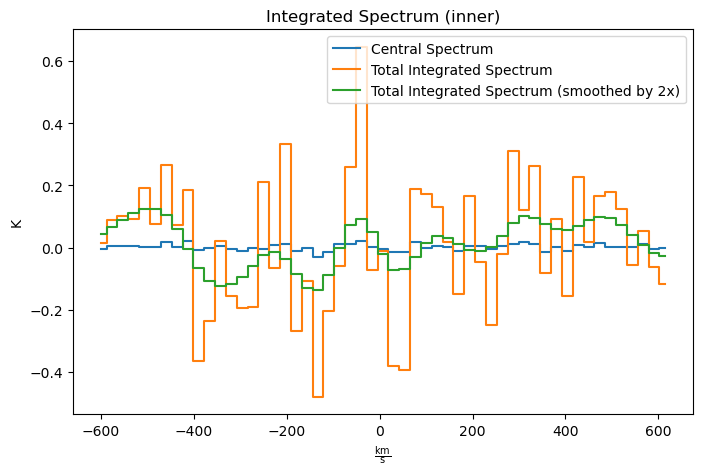

/arc/home/swilkinson/.local/lib/python3.11/site-packages/astropy/units/quantity.py:1843: RuntimeWarning: Degrees of freedom <= 0 for slice.
  return super().__array_function__(function, types, args, kwargs)
/tmp/ipykernel_110/393836164.py:39: RuntimeWarning: divide by zero encountered in log10
  M_H2_outer, M_H2_outer_err                 = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'outer', a_CO = 4.35))


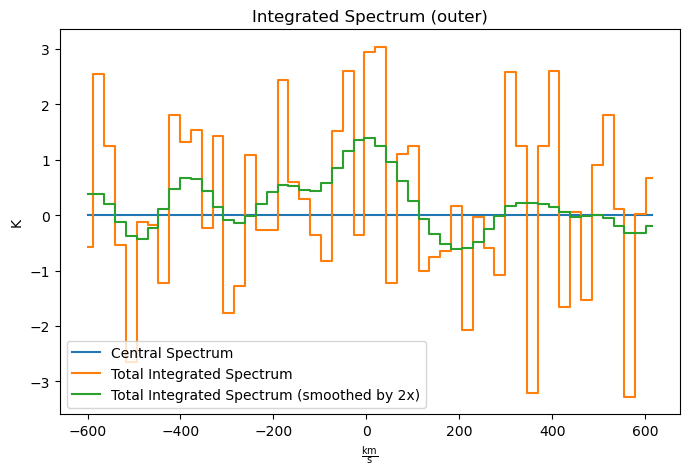

/arc/home/swilkinson/.local/lib/python3.11/site-packages/astropy/units/quantity.py:1843: RuntimeWarning: Degrees of freedom <= 0 for slice.
  return super().__array_function__(function, types, args, kwargs)


Total log10(MH2):  -inf
Inner log10(MH2):  -inf
Outer log10(MH2):  -inf
Inner (stacked) log10(MH2):  6.443458923685694
Outer (stacked) log10(MH2):  7.636874438105922

Fraction of pixels covered (inner):  0.0
Fraction of pixels covered (outer):  0.0

587726015069421743
'resolution' from archive:  2.3190246811452333
587726015069421743 failed.
587726015069421749
'resolution' from archive:  2.345690848615112



/tmp/ipykernel_110/393836164.py:36: RuntimeWarning: divide by zero encountered in log10
  M_H2, M_H2_err                             = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'total', a_CO = 4.35))
/tmp/ipykernel_110/393836164.py:37: RuntimeWarning: divide by zero encountered in log10
  M_H2_inner, M_H2_inner_err                 = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'inner', a_CO = 4.35))


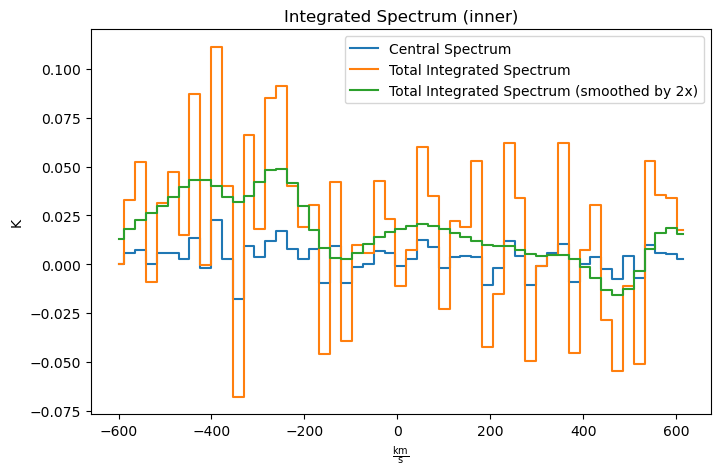

/arc/home/swilkinson/.local/lib/python3.11/site-packages/astropy/units/quantity.py:1843: RuntimeWarning: Degrees of freedom <= 0 for slice.
  return super().__array_function__(function, types, args, kwargs)
/tmp/ipykernel_110/393836164.py:39: RuntimeWarning: divide by zero encountered in log10
  M_H2_outer, M_H2_outer_err                 = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'outer', a_CO = 4.35))


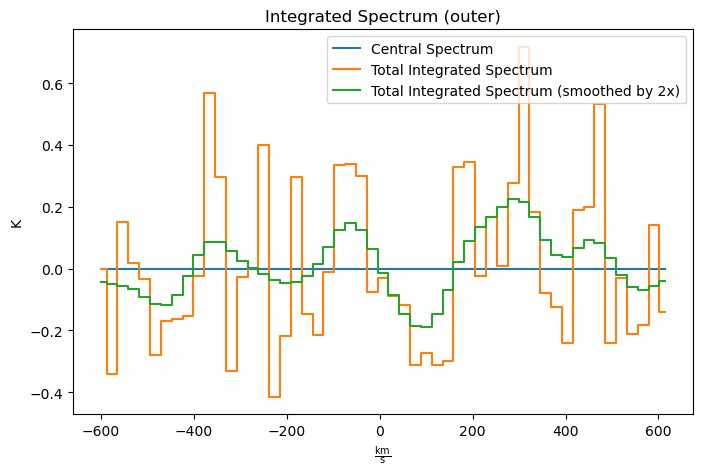

/arc/home/swilkinson/.local/lib/python3.11/site-packages/astropy/units/quantity.py:1843: RuntimeWarning: Degrees of freedom <= 0 for slice.
  return super().__array_function__(function, types, args, kwargs)


Total log10(MH2):  -inf
Inner log10(MH2):  -inf
Outer log10(MH2):  -inf
Inner (stacked) log10(MH2):  7.180725159869696
Outer (stacked) log10(MH2):  6.903051031181726

Fraction of pixels covered (inner):  0.0
Fraction of pixels covered (outer):  0.0

587726015085478016
'resolution' from archive:  1.093969002401203
587726015085478016 failed.
587726015086723332
'resolution' from archive:  1.7624829905872923



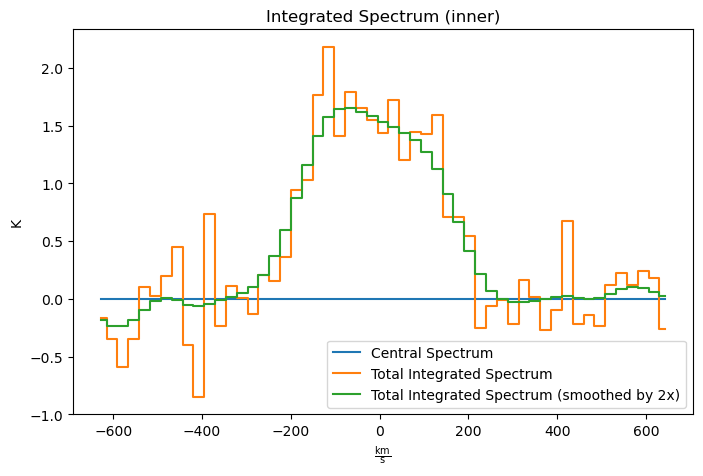

/arc/home/swilkinson/.local/lib/python3.11/site-packages/astropy/units/quantity.py:1843: RuntimeWarning: Degrees of freedom <= 0 for slice.
  return super().__array_function__(function, types, args, kwargs)


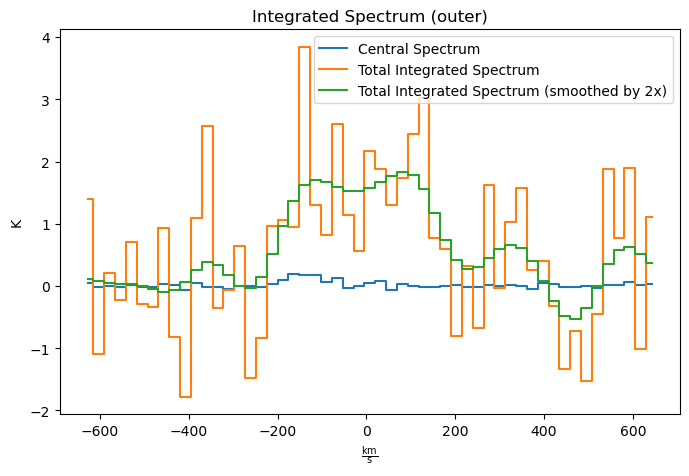

/arc/home/swilkinson/.local/lib/python3.11/site-packages/astropy/units/quantity.py:1843: RuntimeWarning: Degrees of freedom <= 0 for slice.
  return super().__array_function__(function, types, args, kwargs)


Total log10(MH2):  9.440692528885949
Inner log10(MH2):  9.221770850671193
Outer log10(MH2):  9.038324604987244
Inner (stacked) log10(MH2):  9.258828928244332
Outer (stacked) log10(MH2):  9.40648582526903

Fraction of pixels covered (inner):  0.8695652173913043
Fraction of pixels covered (outer):  0.23870967741935484

587726015087575099
'resolution' from archive:  1.7326836874595628



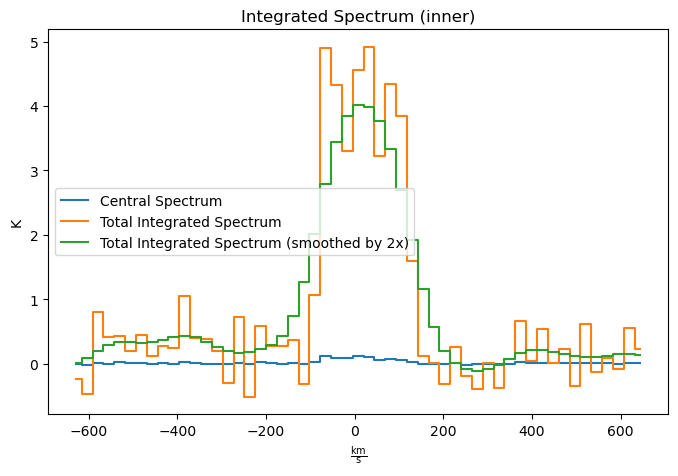

/arc/home/swilkinson/.local/lib/python3.11/site-packages/astropy/units/quantity.py:1843: RuntimeWarning: Degrees of freedom <= 0 for slice.
  return super().__array_function__(function, types, args, kwargs)


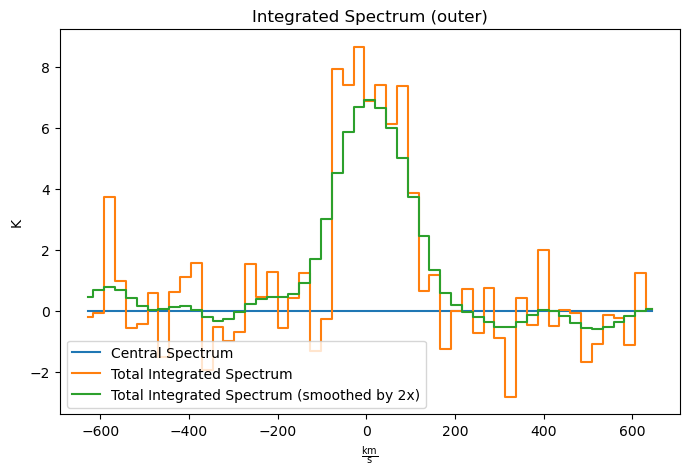

/arc/home/swilkinson/.local/lib/python3.11/site-packages/astropy/units/quantity.py:1843: RuntimeWarning: Degrees of freedom <= 0 for slice.
  return super().__array_function__(function, types, args, kwargs)


Total log10(MH2):  9.147596896418147
Inner log10(MH2):  8.85560105130148
Outer log10(MH2):  8.834822450255905
Inner (stacked) log10(MH2):  8.965260102386772
Outer (stacked) log10(MH2):  9.081387152868858

Fraction of pixels covered (inner):  1.0
Fraction of pixels covered (outer):  0.4971590909090909

587726015620317332
'resolution' from archive:  1.0512567500687395



In [ ]:
##########################################################################

# wipe file
outfile = '/arc/projects/salvage/ALMA_reduction/salvage-AGN-Aug26-sample_match-lt-4rp_mrs-gt-2rp_qa2-pass_no-inf-dups.out'
out = open(outfile, 'w')
out.write('#objID M_H2 M_H2_err M_H2_inner M_H2_inner_err M_H2_outer M_H2_outer_err M_H2_inner_stacked M_H2_inner_stacked_err M_H2_outer_stacked M_H2_outerer_stacked_err f_inner f_outer \n')
out.close()

rerun_targets = ['588017992295972989', '588848899376939030']

for i in range(len(objID_sample)):

    ID = objID_sample[i]
    NAME = name_sample[i]
    Z = z_sample[i]
    M = mass_sample[i]
    R = rpetro_sample[i]
    RA = ra_sample[i]
    DEC = dec_sample[i]

    # running only on problem galaxies
    #if ID not in rerun_targets:
    #   continue

    print(ID)
    print('\'resolution\' from archive: ', res_sample[i])

    imagename = f'/arc/projects/salvage/ALMA_reduction/phangs_pipeline/derived/{ID}/{ID}_12m_co10_MOMENTTYPE.fits'
    
    try:
        
        #demo_PHANGS_moments_annuli_wcs2(imagename, Z, RA, DEC, 2*R, ID)

        #demo_image_and_moment_separate(imagename, Z, RA, DEC, 2*R, ID)

        M_H2, M_H2_err                             = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'total', a_CO = 4.35))
        M_H2_inner, M_H2_inner_err                 = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'inner', a_CO = 4.35))
        M_H2_inner_stacked, M_H2_inner_stacked_err = np.log10(MH2_from_cube(ID, Z, RA, DEC, 2*R, mask_type = 'inner', a_CO = 4.35))
        M_H2_outer, M_H2_outer_err                 = np.log10(MH2_from_mom0(ID, Z, RA, DEC, 2*R, mask_type = 'outer', a_CO = 4.35))
        M_H2_outer_stacked, M_H2_outer_stacked_err = np.log10(MH2_from_cube(ID, Z, RA, DEC, 2*R, mask_type = 'outer', a_CO = 4.35))

        print('Total log10(MH2): ', M_H2)
        print('Inner log10(MH2): ', M_H2_inner)
        print('Outer log10(MH2): ', M_H2_outer)
        print('Inner (stacked) log10(MH2): ', M_H2_inner_stacked)
        print('Outer (stacked) log10(MH2): ', M_H2_outer_stacked)
        print()

        f_inner, f_outer = mom0_pixel_coverage(ID, Z, RA, DEC, 2*R)

        print('Fraction of pixels covered (inner): ', f_inner)
        print('Fraction of pixels covered (outer): ', f_outer)
        print()

        # output to file
        out = open(outfile, 'a')
        out.write(f'{ID} {M_H2} {M_H2_err} {M_H2_inner} {M_H2_inner_err} {M_H2_outer} {M_H2_outer_err} {M_H2_inner_stacked} {M_H2_inner_stacked_err} {M_H2_outer_stacked} {M_H2_outer_stacked_err} {f_inner} {f_outer}\n')
        out.close()

    except:

        print(ID, 'failed.')


In [20]:
beam_sizes = []

for ID in objID_sample:

    file_0       = f'/arc/projects/salvage/ALMA_reduction/phangs_pipeline/derived/{ID}/{ID}_12m_co10_MOMENTTYPE.fits'

    try:
        header_0     = pyfits.getheader(file_0.replace('MOMENTTYPE', 'strict_mom0'))
        beam_sizes.append(header_0['BMAJ']*3600)
    except:
        continue
        
beam_sizes = np.array(beam_sizes)

In [21]:
len(beam_sizes[beam_sizes>3])/len(beam_sizes)

0.3493150684931507

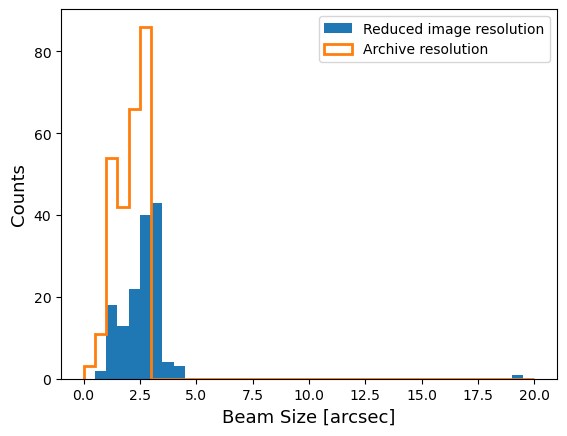

In [22]:
plt.figure()
plt.hist(beam_sizes, bins = 40, range = [0,20], label = 'Reduced image resolution')
plt.hist(res_sample, bins = 40, range = [0,20], histtype = 'step', lw = 2, label = 'Archive resolution')
plt.xlabel('Beam Size [arcsec]', fontsize = 13)
plt.ylabel('Counts', fontsize = 13)
plt.legend()
plt.show()

587731511545233578
'resolution' from archive:  1.7450853432403626
'BMAJ' from header:  1.91962841937336


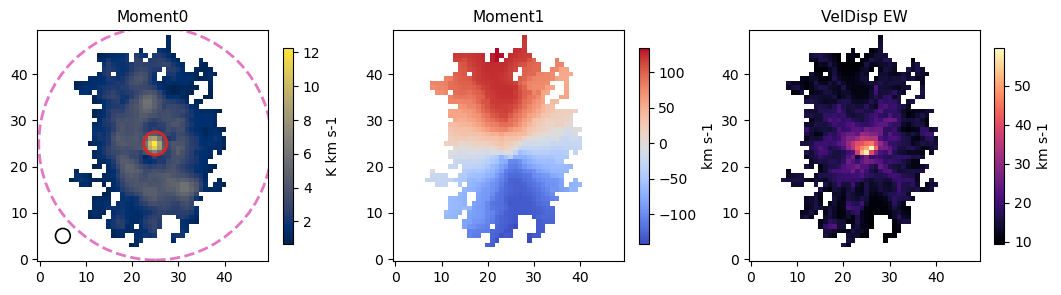

log(MH2) =  9.04993 +/-  0.00238
log(MH2) (inner) =  7.78963 +/-  0.00599
log(MH2) (outer) =  9.02540 +/-  0.00163
log(MH2) (inner+outer) =  9.04993


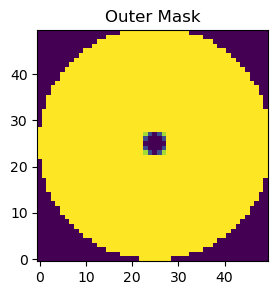

NameError: name 'demo_moments_on_image_centering' is not defined

In [46]:
# wipe file
out = open('/arc/projects/salvage/ALMA_reduction/gas_masses_Jun18.txt', 'w')
out.write('#objID M_H2 M_H2_err M_H2_inner M_H2_inner_err M_H2_outer M_H2_outer_err\n')
out.close()

rerun_targets = ['587731513153159199', '587731511545233578', '587732053236384121', '588017992295972989']

for i in range(len(objID_sample)):

    ID = objID_sample[i]
    NAME = name_sample[i]
    Z = z_sample[i]
    M = mass_sample[i]
    R = rpetro_sample[i]
    RA = ra_sample[i]
    DEC = dec_sample[i]

    # running only on problem galaxies
    if ID not in rerun_targets:
        continue

    print(ID)
    print('\'resolution\' from archive: ', res_sample[i])

    imagename = f'/arc/projects/salvage/ALMA_reduction/phangs_pipeline/derived/{ID}/{ID}_12m_co10_MOMENTTYPE.fits'

    try:
        demo_PHANGS_moments_annuli(imagename, Z, 2*R, ID)
    except:
        print('failed moment')

    #view_image(Z, ID)

    #try:
    demo_moments_on_image_centering(imagename, Z, ID, 2*R, RA, DEC)
    #except:
    #    print('failed image')

In [24]:
#Query MySQL for SDSS ancillary data

db = pymysql.connect(host = 'lauca.phys.uvic.ca', db = 'sdss', user = 'swilkinson', passwd = '123Sdss!@#')
x = 'SELECT u.objID, u.ra, u.decl, u.total_mass_med, u.z_spec, u.petroR50_r, u.total_sfr_med, u.fiber_mass_med, u.fiber_sfr_med FROM  dr7_uberuber u WHERE u.total_mass_med > 1 AND u.z_spec < 0.5 AND u.decl < 47'
c = db.cursor()
c.execute(x)
db_data = c.fetchall()
c.close()
db.close()
	
# transpose queried table
data = np.array(db_data, dtype = float).T
table_id = np.array(db_data, dtype = str).T[0]

ra_sdss = data[1]
dec_sdss = data[2]
mass_sdss = data[3]
z_sdss = data[4]
rpetro_sdss = data[5]
sfr_sdss = data[6]
fib_mass_sdss = data[7]
fib_sfr_sdss = data[8]

# match to salvage products
objID_gas = np.loadtxt('/arc/projects/salvage/ALMA_reduction/salvage-AGN-July17-sample_match-lt-4rp_mrs-gt-2rp_qa2-pass_no-inf-dups.out', unpack = True, usecols = [0], dtype = 'str')
M_H2, M_H2_err, M_H2_inner, M_H2_inner_err, M_H2_outer, M_H2_outer_err, M_H2_inner_stacked, M_H2_outer_stacked = np.loadtxt('/arc/projects/salvage/ALMA_reduction/salvage-AGN-July17-sample_match-lt-4rp_mrs-gt-2rp_qa2-pass_no-inf-dups.out', unpack = True, usecols = [1,2,3,4,5,6,7,8])
match, table_idx, gas_idx = np.intersect1d(table_id, objID_gas, return_indices = True)
print(len(match))

# higher order salvage products
fgas_inner = 10**M_H2_inner[gas_idx] / 10**fib_mass_sdss[table_idx]
fgas_outer = 10**M_H2_outer[gas_idx] / (10**mass_sdss[table_idx] - 10**fib_mass_sdss[table_idx])
fgas_grad = fgas_inner/ fgas_outer

66


/tmp/ipykernel_79/631921127.py:33: RuntimeWarning: invalid value encountered in divide
  fgas_grad = fgas_inner/ fgas_outer


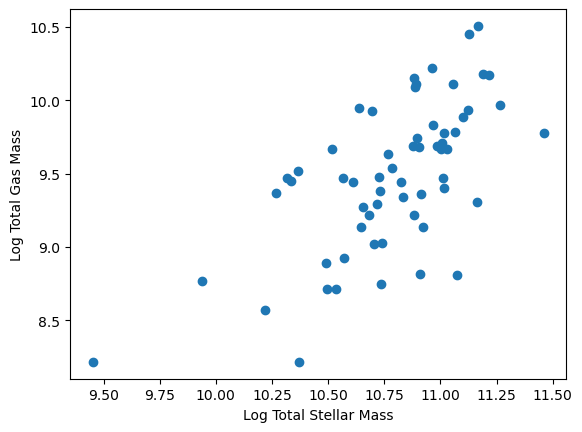

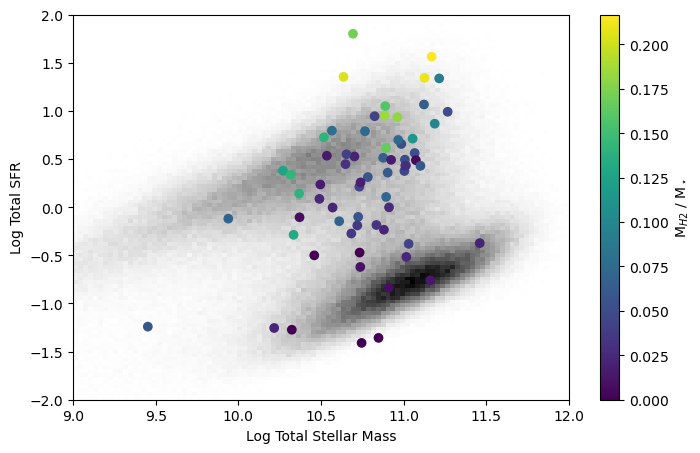

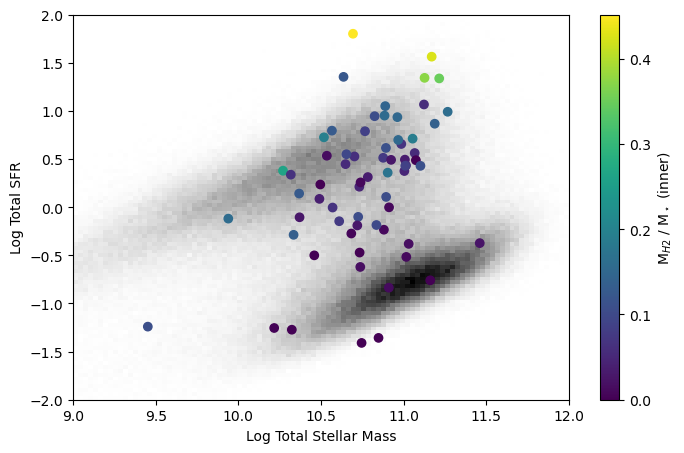

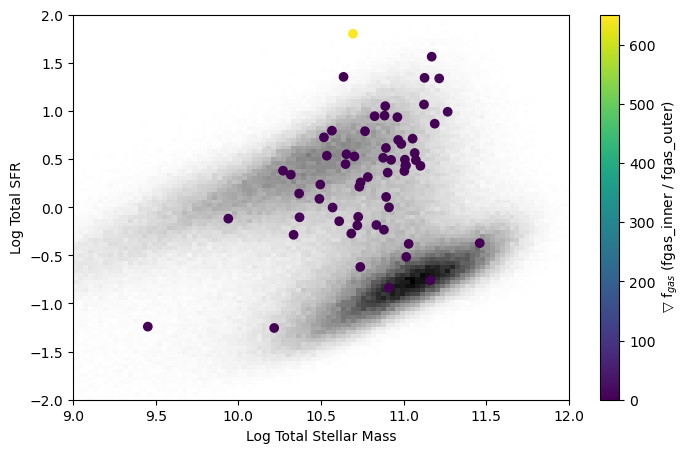

In [25]:
plt.figure()
plt.scatter(mass_sdss[table_idx], M_H2[gas_idx])
plt.xlabel('Log Total Stellar Mass')
plt.ylabel('Log Total Gas Mass')
plt.show()

plt.figure(figsize = (8,5))
plt.hist2d(mass_sdss, sfr_sdss, cmap='gray_r', range = [[9,12], [-2,2]], bins = 100)
plt.scatter(mass_sdss[table_idx], sfr_sdss[table_idx], c = 10**M_H2[gas_idx] / 10**mass_sdss[table_idx])
plt.colorbar(label = 'M$_{H2}$ / M$_\star$')
plt.xlabel('Log Total Stellar Mass')
plt.ylabel('Log Total SFR')
plt.show()

plt.figure(figsize = (8,5))
plt.hist2d(mass_sdss, sfr_sdss, cmap='gray_r', range = [[9,12], [-2,2]], bins = 100)
plt.scatter(mass_sdss[table_idx], sfr_sdss[table_idx], c = fgas_inner)
plt.colorbar(label = 'M$_{H2}$ / M$_\star$ (inner)')
plt.xlabel('Log Total Stellar Mass')
plt.ylabel('Log Total SFR')
plt.show()

plt.figure(figsize = (8,5))
plt.hist2d(mass_sdss, sfr_sdss, cmap='gray_r', range = [[9,12], [-2,2]], bins = 100)
plt.scatter(mass_sdss[table_idx], sfr_sdss[table_idx], c = fgas_grad)
plt.colorbar(label = ' $\\bigtriangledown$ f$_{gas}$ (fgas_inner / fgas_outer)')
plt.xlabel('Log Total Stellar Mass')
plt.ylabel('Log Total SFR')
plt.show()

In [11]:
#Query MySQL for SDSS and xCOLD GASS ancillary data

db = pymysql.connect(host = 'lauca.phys.uvic.ca', db = 'sdss', user = 'swilkinson', passwd = '123Sdss!@#')
x = 'SELECT u.objID, u.ra, u.decl, u.total_mass_med, u.z_spec, u.petroR50_r, u.total_sfr_med, u.fiber_mass_med, u.fiber_sfr_med, x.LogMH2, x.LogMH2_lim FROM dr7_uberuber u, xCOLDGASS x WHERE u.objID=x.objID AND u.total_mass_med > 1 AND u.z_spec < 0.5 AND u.decl < 47'
c = db.cursor()
c.execute(x)
db_data = c.fetchall()
c.close()
db.close()
	
# transpose queried table
data = np.array(db_data, dtype = float).T
table_id_xcg = np.array(db_data, dtype = str).T[0]

ra_xcg = data[1]
dec_xcg = data[2]
mass_xcg = data[3]
z_xcg = data[4]
rpetro_xcg = data[5]
sfr_xcg = data[6]
fib_mass_xcg = data[7]
fib_sfr_xcg = data[8]
M_H2_xcg = data[9]
M_H2_lim_xcg = data[10]

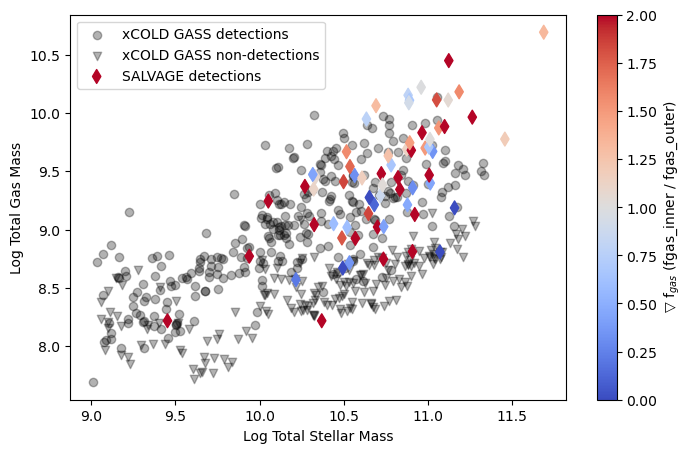

In [12]:
plt.figure(figsize = (8,5))
#plt.hist2d(mass_xcg, M_H2_xcg, cmap='gray_r', range = [[9,12], [5,11]], bins = 10)
plt.scatter(mass_xcg[M_H2_xcg>1], M_H2_xcg[M_H2_xcg>1], c = 'k', alpha = 0.3, label = 'xCOLD GASS detections')
plt.scatter(mass_xcg[M_H2_xcg<1], M_H2_lim_xcg[M_H2_xcg<1], c = 'k', alpha = 0.3, marker = 'v', label = 'xCOLD GASS non-detections')
plt.scatter(mass_sdss[table_idx], M_H2[gas_idx], c=fgas_grad, label = 'SALVAGE detections', cmap = 'coolwarm', vmin = 0, vmax = 2, s = 50, marker = 'd')
plt.colorbar(label = ' $\\bigtriangledown$ f$_{gas}$ (fgas_inner / fgas_outer)')
plt.xlabel('Log Total Stellar Mass')
plt.ylabel('Log Total Gas Mass')
plt.legend(fancybox = True)
plt.show()

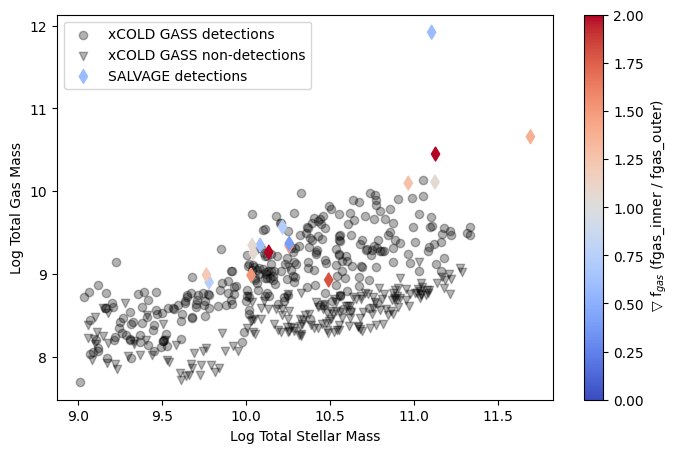

In [121]:
plt.figure(figsize = (8,5))
#plt.hist2d(mass_xcg, M_H2_xcg, cmap='gray_r', range = [[9,12], [5,11]], bins = 10)
plt.scatter(mass_xcg[M_H2_xcg>1], M_H2_xcg[M_H2_xcg>1], c = 'k', alpha = 0.3, label = 'xCOLD GASS detections')
plt.scatter(mass_xcg[M_H2_xcg<1], M_H2_lim_xcg[M_H2_xcg<1], c = 'k', alpha = 0.3, marker = 'v', label = 'xCOLD GASS non-detections')
plt.scatter(mass_sdss[table_idx], M_H2[gas_idx], c=fgas_grad, label = 'SALVAGE detections', cmap = 'coolwarm', vmin = 0, vmax = 2, s = 50, marker = 'd')
plt.colorbar(label = ' $\\bigtriangledown$ f$_{gas}$ (fgas_inner / fgas_outer)')
plt.xlabel('Log Total Stellar Mass')
plt.ylabel('Log Total Gas Mass')
plt.legend(fancybox = True)
plt.show()

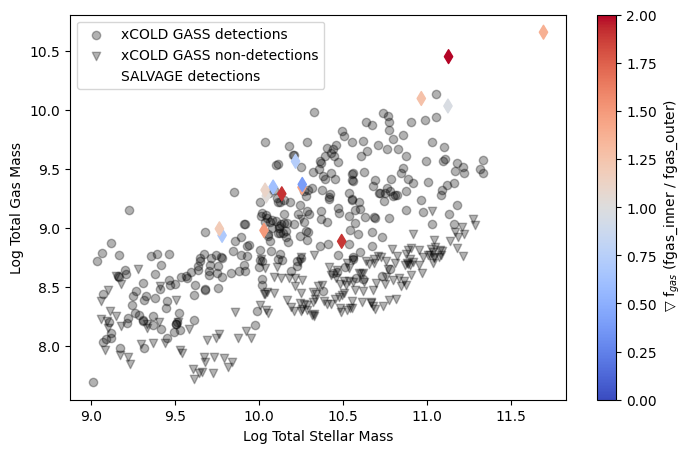

In [89]:
plt.figure(figsize = (8,5))
#plt.hist2d(mass_xcg, M_H2_xcg, cmap='gray_r', range = [[9,12], [5,11]], bins = 10)
plt.scatter(mass_xcg[M_H2_xcg>1], M_H2_xcg[M_H2_xcg>1], c = 'k', alpha = 0.3, label = 'xCOLD GASS detections')
plt.scatter(mass_xcg[M_H2_xcg<1], M_H2_lim_xcg[M_H2_xcg<1], c = 'k', alpha = 0.3, marker = 'v', label = 'xCOLD GASS non-detections')
plt.scatter(mass_sdss[table_idx], M_H2[gas_idx], c=fgas_grad, label = 'SALVAGE detections', cmap = 'coolwarm', vmin = 0, vmax = 2, s = 50, marker = 'd')
plt.colorbar(label = ' $\\bigtriangledown$ f$_{gas}$ (fgas_inner / fgas_outer)')
plt.xlabel('Log Total Stellar Mass')
plt.ylabel('Log Total Gas Mass')
plt.legend(fancybox = True)
plt.show()

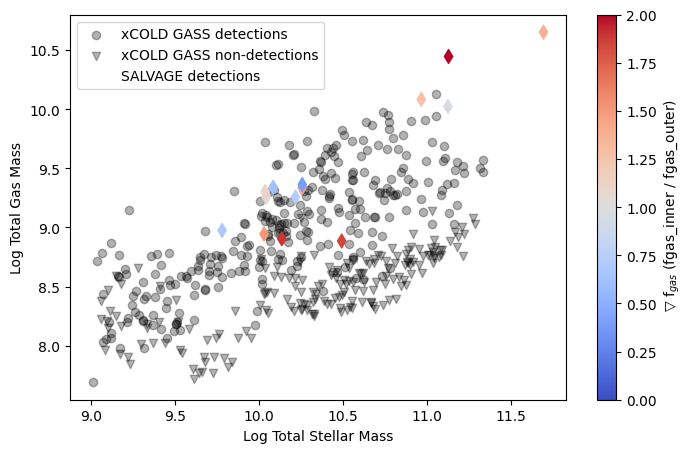

In [68]:
# when more strict masks are used ... (3 channels for low-SNR mask)

plt.figure(figsize = (8,5))
#plt.hist2d(mass_xcg, M_H2_xcg, cmap='gray_r', range = [[9,12], [5,11]], bins = 10)
plt.scatter(mass_xcg[M_H2_xcg>1], M_H2_xcg[M_H2_xcg>1], c = 'k', alpha = 0.3, label = 'xCOLD GASS detections')
plt.scatter(mass_xcg[M_H2_xcg<1], M_H2_lim_xcg[M_H2_xcg<1], c = 'k', alpha = 0.3, marker = 'v', label = 'xCOLD GASS non-detections')
plt.scatter(mass_sdss[table_idx], M_H2[gas_idx], c=fgas_grad, label = 'SALVAGE detections', cmap = 'coolwarm', vmin = 0, vmax = 2, s = 50, marker = 'd')
plt.colorbar(label = ' $\\bigtriangledown$ f$_{gas}$ (fgas_inner / fgas_outer)')
plt.xlabel('Log Total Stellar Mass')
plt.ylabel('Log Total Gas Mass')
plt.legend(fancybox = True)
plt.show()

In [129]:
match, idx_sdss, idx_xcg = np.intersect1d(table_id[table_idx],table_id_xcg, return_indices = True)

In [74]:
M_H2_xcg[idx_xcg] - M_H2[gas_idx][idx_sdss]

array([-0.15088169])

In [131]:
print(table_id_xcg[idx_xcg], objID_gas[gas_idx][idx_sdss])

['587727221402042402'] ['587727221402042402']


In [130]:
M_H2_xcg[idx_xcg] - M_H2[gas_idx][idx_sdss]

array([-0.14659128])